In [529]:
 
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
import numpy as np

# Data Loading and Exploration


In [543]:
# read the dataset
myDataSet = pd.read_csv('./data/HR_dataset.csv')

In [544]:
# display the first few rows of the DataFrame.
print(myDataSet.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [545]:
# overview of the DataFrame structure ,data types , and size
print(myDataSet.size)
print(myDataSet.shape)
print(myDataSet.empty)

51450
(1470, 35)
False


In [561]:
print(myDataSet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

# Data Preprocessing 


In [546]:
#check for duplicates
duplicates = myDataSet.duplicated()

# count the total number of duplicates
num_duplicates = duplicates.sum()

print("Number of duplicates in the dataset:", num_duplicates)


Number of duplicates in the dataset: 0


In [547]:
# Count missing values in each column (null)
missing_values = myDataSet.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

In [548]:
# check for special Characters 
def check_dataset(df):
    found_special_character = False
    for column in df.columns:
        for index, value in df[column].items():
            for character in str(value):  # value is treated as a string
                if character in string.punctuation:
                    print(f"String contains special character in row {index}, column '{column}': '{value}'")
                    found_special_character = True
                    break
            if found_special_character:
                break
        if found_special_character:
            break
    if not found_special_character:
        print(" No special characters are found ")




check_dataset(myDataSet)

String contains special character in row 0, column 'BusinessTravel': 'Travel_Rarely'


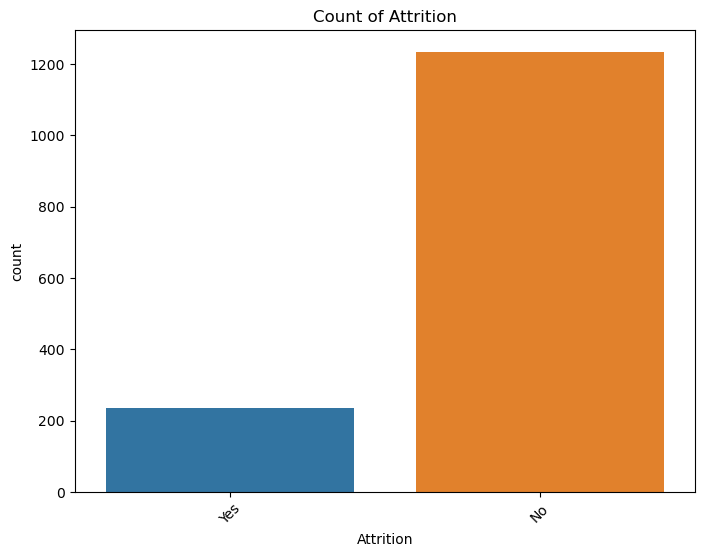

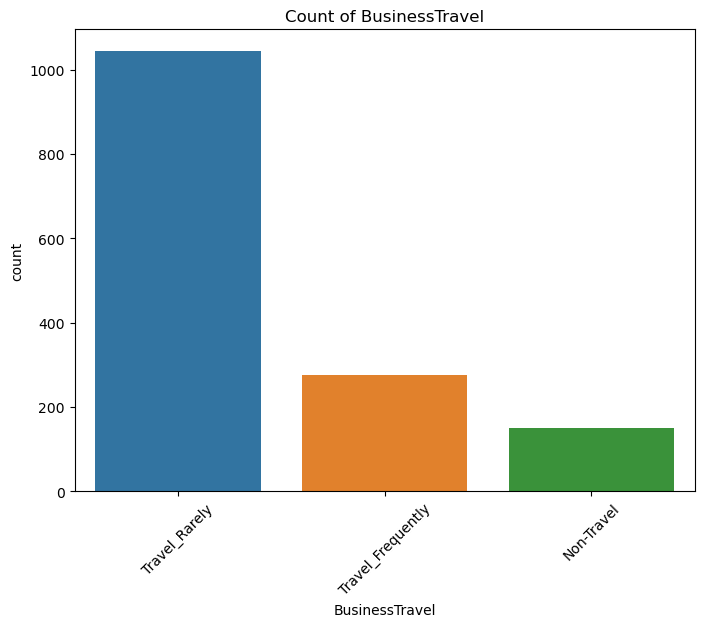

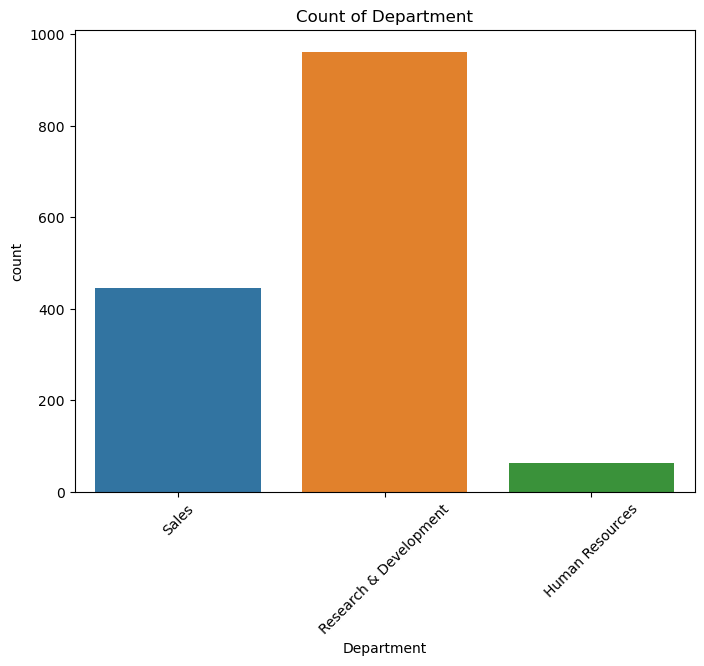

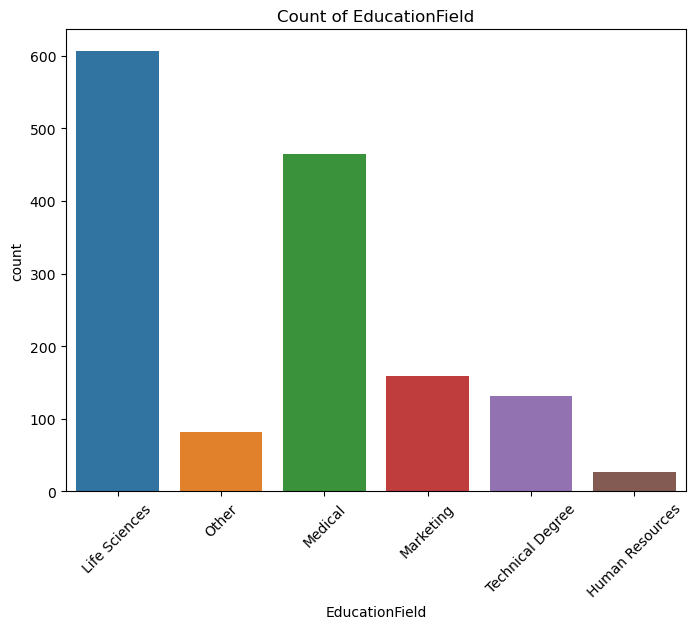

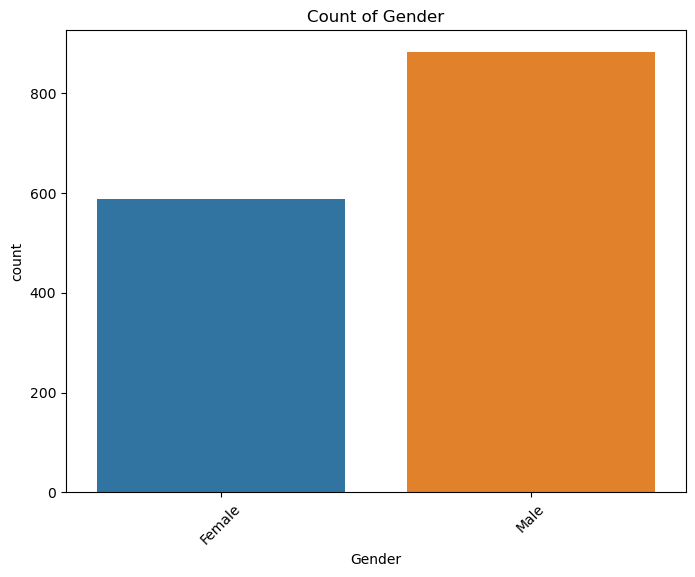

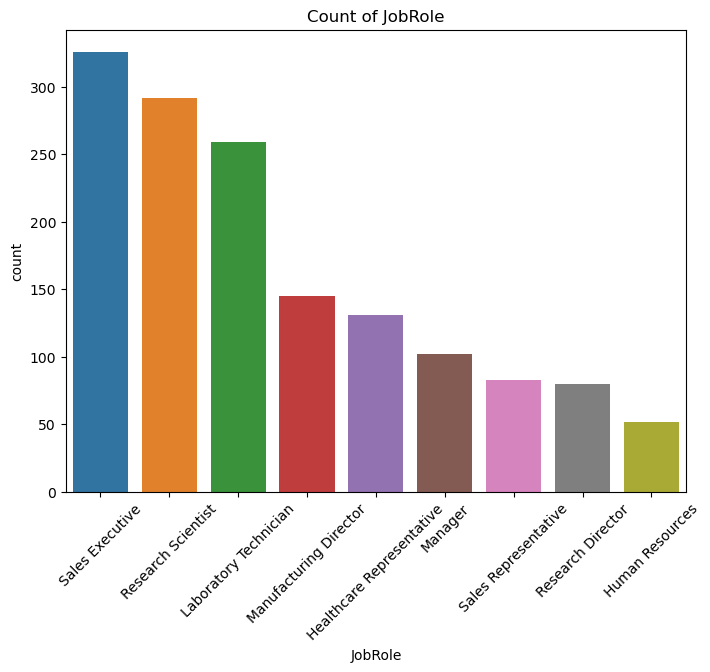

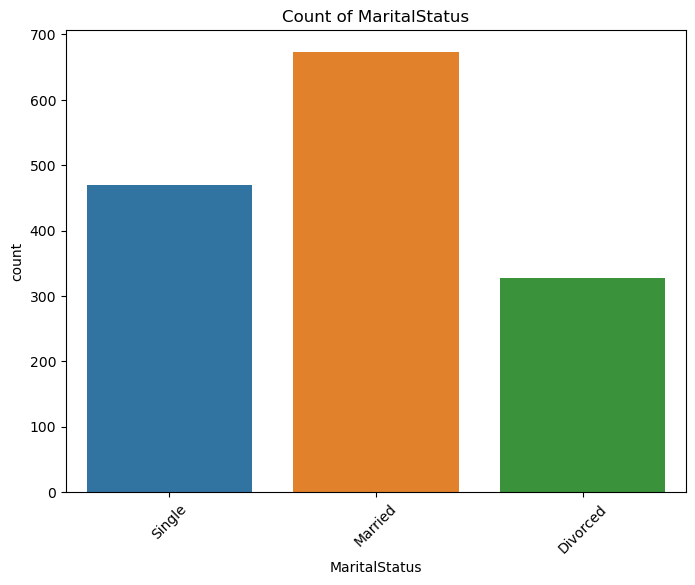

In [563]:
# Bar plot for categorical variables
categorical_vars = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=myDataSet)
    plt.title(f'Count of {var}')
    plt.xticks(rotation=45)
    plt.show()

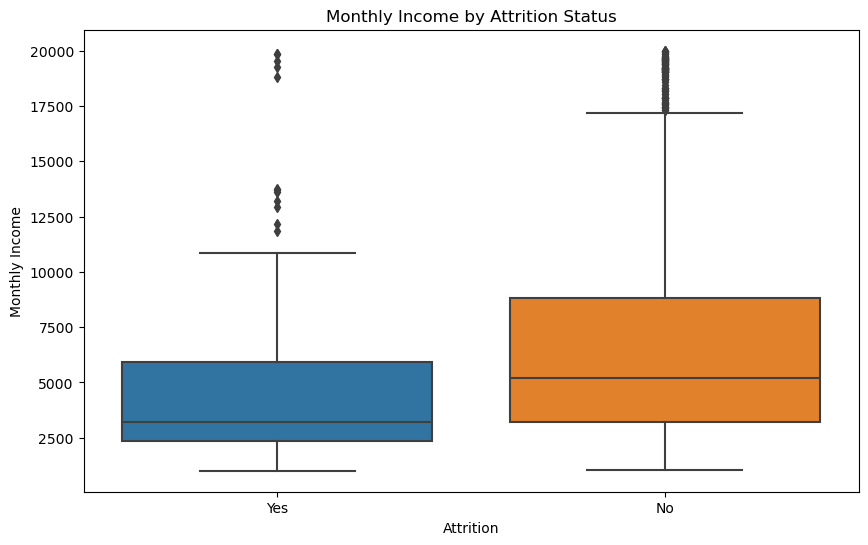

In [549]:
# Box Plot of MonthlyIncome by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=myDataSet, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

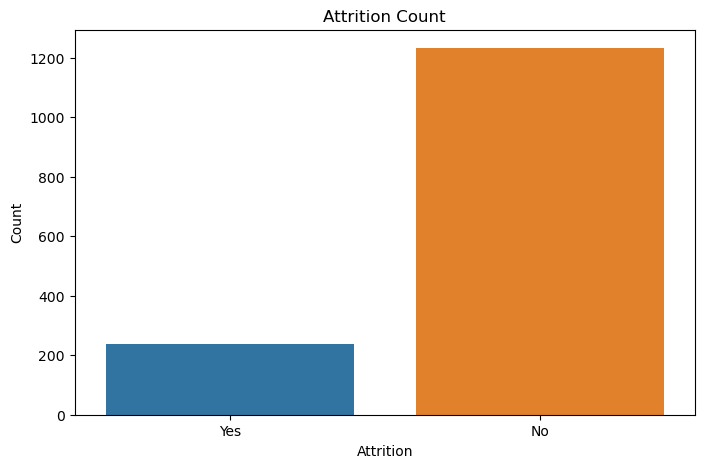

In [550]:
# Bar Plot of Attrition Count
plt.figure(figsize=(8, 5))
sns.countplot(data=myDataSet, x='Attrition')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

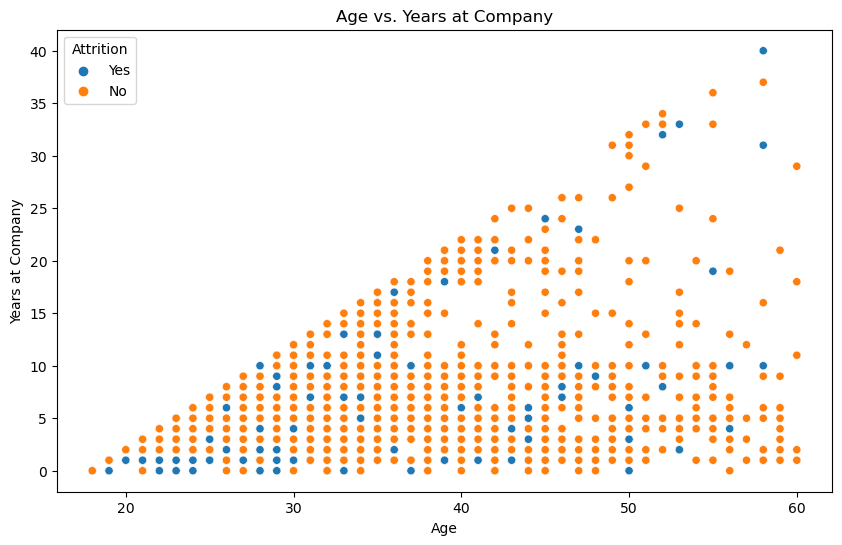

In [551]:
# Scatter Plot of Age vs. YearsAtCompany
plt.figure(figsize=(10, 6))
sns.scatterplot(data=myDataSet, x='Age', y='YearsAtCompany', hue='Attrition')
plt.title('Age vs. Years at Company')
plt.xlabel('Age')
plt.ylabel('Years at Company')
plt.show()

# Standardizing Data Formats

In [457]:
# Select columns with a string data types
categorical_columns = myDataSet.select_dtypes(include=['object', 'category']).columns.tolist()
print("categorical_columns:")
print(categorical_columns)


categorical_columns:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [458]:

# check Unique Values
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(myDataSet[column].value_counts())
    print()

Unique values in Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Unique values in BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Unique values in Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Unique values in EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Unique values in Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

Unique values in JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             

In [527]:
# Remove Whitespace
for column in categorical_columns:
    myDataSet[column] = myDataSet[column].str.strip()

# Identify and handle outliers

In [460]:
#select Numerical Columns
numerical_columns = myDataSet.select_dtypes(include=np.number).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)

#count the number of numerical columns
numerical_columns_count = len(numerical_columns)
print("Number of numerical columns:", numerical_columns_count)



Numerical Columns:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Number of numerical columns: 26


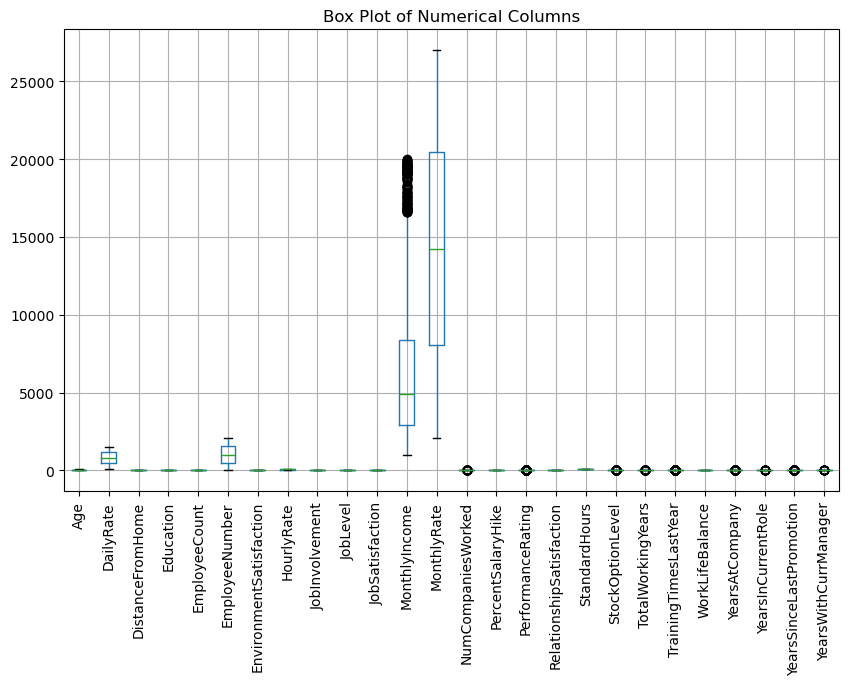

In [560]:
# Box Plot to identify outliers
plt.figure(figsize=(10, 6))
myDataSet[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=90)
plt.show()

# Data Transformation

In [465]:


# define age ranges and labels
age_bins = [0, 30, 50, float('inf')]  # Define the age bins: 0-30, 31-50, 51+
age_labels = ['Young', 'Middle-aged', 'Senior']  # Labels for the age groups


# create a new column 'AgeGroup' representing the age groups
myDataSet['AgeGroup'] = pd.cut(myDataSet['Age'], bins=age_bins, labels=age_labels, right=False)

# display
print(myDataSet[['Age', 'AgeGroup']].head())



   Age     AgeGroup
0   41  Middle-aged
1   49  Middle-aged
2   37  Middle-aged
3   33  Middle-aged
4   27        Young


In [466]:
# Check unique values in the 'JobSatisfaction' and EnvironmentSatisfactioncolumn 
#To determine the scale of the 'JobSatisfaction' and 'EnvironmentSatisfaction' columns (whether it ranges from 1 to 5 or from 1 to 10)
unique_values = myDataSet['JobSatisfaction'].unique()
unique_values.sort()
print(unique_values)


unique_values_environment = myDataSet['EnvironmentSatisfaction'].unique()
unique_values_environment.sort()
print(unique_values_environment)


[1 2 3 4]
[1 2 3 4]


In [557]:

# calculate the average of JobSatisfaction and EnvironmentSatisfaction
average_satisfaction = (myDataSet['JobSatisfaction'] + myDataSet['EnvironmentSatisfaction']) / 2

# Scale the EmployeeSatisfaction column based on the average satisfaction value using min-max scaling formula
max_satisfaction = average_satisfaction.max()
min_satisfaction = average_satisfaction.min()
scaled_employee_satisfaction = ((5 * (average_satisfaction - min_satisfaction)) / (max_satisfaction - min_satisfaction)).round().astype(int)

# to prevent overwriting 'EmployeeSatisfaction' column every time we run the snippet:
# check if 'EmployeeSatisfaction' column already exists

if 'EmployeeSatisfaction' not in myDataSet.columns:
    myDataSet['EmployeeSatisfaction'] = scaled_employee_satisfaction
else:
    print("Warning: 'EmployeeSatisfaction' column already exists. Skipping creation.")

#show first few rows
print(myDataSet[['JobSatisfaction', 'EnvironmentSatisfaction', 'EmployeeSatisfaction']].head())

 


   JobSatisfaction  EnvironmentSatisfaction  EmployeeSatisfaction
0                4                        2                     3
1                2                        3                     2
2                3                        4                     4
3                3                        4                     4
4                2                        1                     1


In [558]:

myDataSet['TotalTenure'] = myDataSet['YearsAtCompany']
myDataSet['RoleTenure'] = myDataSet['YearsInCurrentRole']
myDataSet['TenureSincePromotion'] = myDataSet['YearsSinceLastPromotion']
myDataSet['ManagerTenure'] = myDataSet['YearsWithCurrManager']
myDataSet['TenureOver5Years'] = myDataSet['TotalTenure'] > 5
myDataSet['RoleTenureRatio'] = myDataSet['RoleTenure'] / myDataSet['TotalTenure']
print(myDataSet[['TotalTenure', 'RoleTenure', 'TenureSincePromotion','ManagerTenure','TenureOver5Years','RoleTenureRatio']].head())

print(myDataSet[['TotalTenure', 'RoleTenure','RoleTenureRatio']].head())



   TotalTenure  RoleTenure  TenureSincePromotion  ManagerTenure  \
0            6           4                     0              5   
1           10           7                     1              7   
2            0           0                     0              0   
3            8           7                     3              0   
4            2           2                     2              2   

   TenureOver5Years  RoleTenureRatio  
0              True         0.666667  
1              True         0.700000  
2             False              NaN  
3              True         0.875000  
4             False         1.000000  
   TotalTenure  RoleTenure  RoleTenureRatio
0            6           4         0.666667
1           10           7         0.700000
2            0           0              NaN
3            8           7         0.875000
4            2           2         1.000000


In [554]:
# creates a new column DistanceToWorkCategory
bins = [0, 10, 20, 50, float('inf')]
labels = ['<10 kilometres ', '10-20 kilometres ', '20-50 kilometres ', '>50 kilometres ']
myDataSet['DistanceToWorkCategory'] = pd.cut(myDataSet['DistanceFromHome'], bins=bins, labels=labels)
print(myDataSet[['DistanceToWorkCategory']].head())

  DistanceToWorkCategory
0        <10 kilometres 
1        <10 kilometres 
2        <10 kilometres 
3        <10 kilometres 
4        <10 kilometres 


In [555]:
# Salary Ranges
bins = [0, 3000, 6000, 9000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
myDataSet['SalaryRange'] = pd.cut(myDataSet['MonthlyIncome'], bins=bins, labels=labels)
print(myDataSet[['SalaryRange']].head())

  SalaryRange
0      Medium
1      Medium
2         Low
3         Low
4      Medium


In [556]:
#Job Level Hierarchy
job_level_map = {1: 'Entry-level', 2: 'Mid-level', 3: 'Senior-level', 4: 'Executive-level', 5: 'Senior Executive-level'}
myDataSet['JobLevelHierarchy'] = myDataSet['JobLevel'].map(job_level_map)
print(myDataSet[['JobLevelHierarchy']].head())

  JobLevelHierarchy
0         Mid-level
1         Mid-level
2       Entry-level
3       Entry-level
4       Entry-level


In [542]:
#Performance Rating Categories
performance_rating_map = {1: 'Poor', 2: 'Average', 3: 'Good', 4: 'veryGood',5: 'Excellent'}
myDataSet['PerformanceRatingCategory'] = myDataSet['PerformanceRating'].map(performance_rating_map)
print(myDataSet[['PerformanceRatingCategory']].head())

  PerformanceRatingCategory
0                      Good
1                  veryGood
2                      Good
3                      Good
4                      Good


In [559]:

# Gender Distribution
gender_distribution = myDataSet['Gender'].value_counts()
print(gender_distribution.head())


Gender
Male      882
Female    588
Name: count, dtype: int64


In [541]:
# Calculate the number of employees who left the company
attrition_count = myDataSet['Attrition'].value_counts()['Yes']

print("Number of employees who left the company:", attrition_count)

# Calculate the total number of employees
total_employees = len(myDataSet)
print(" total number of employees:", total_employees)

# Calculate the attrition rate
attrition_rate = (attrition_count / total_employees) * 100


print("Attrition Rate: {:.2f}%".format(attrition_rate))


Number of employees who left the company: 237
 total number of employees: 1470
 attrition rate: 16.122448979591837
Attrition Rate: 16.12%


# visulization

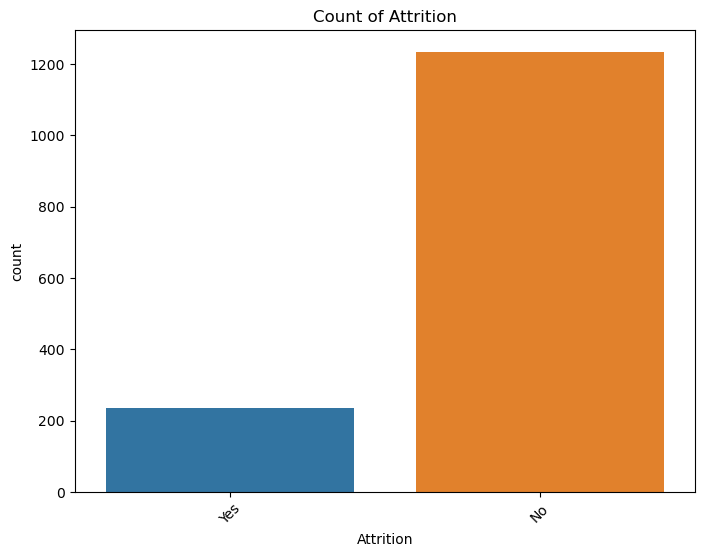

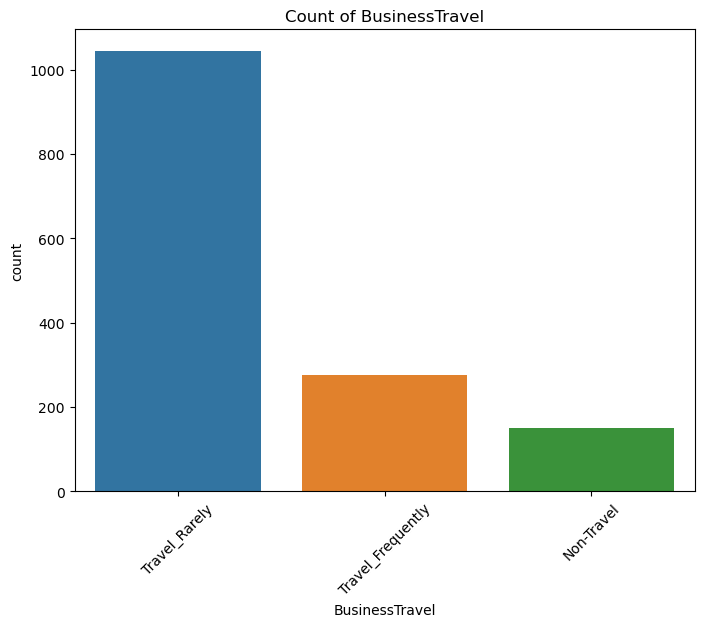

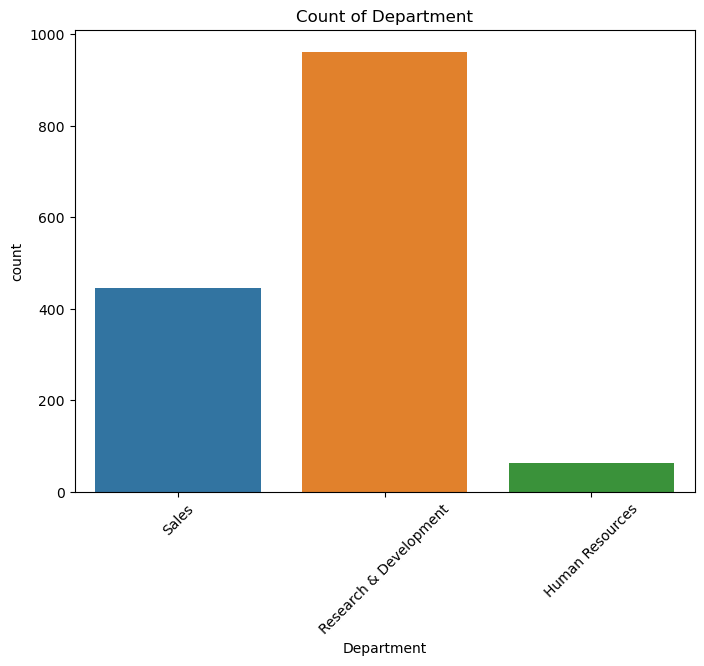

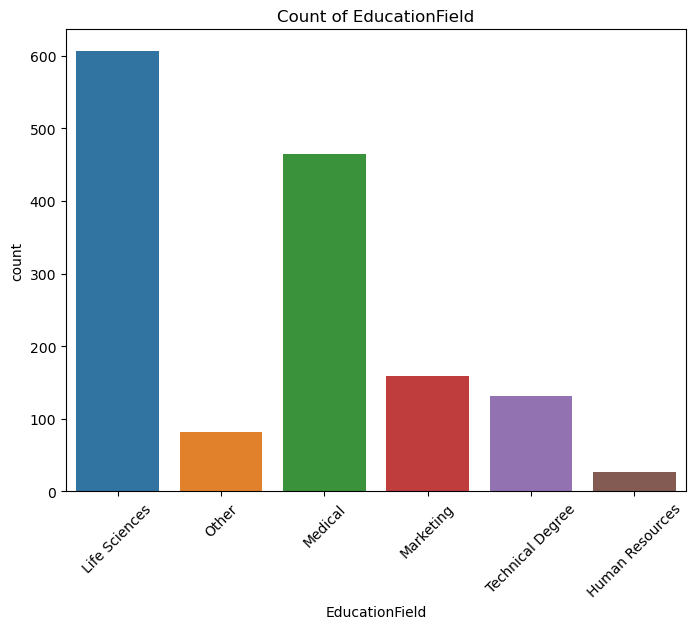

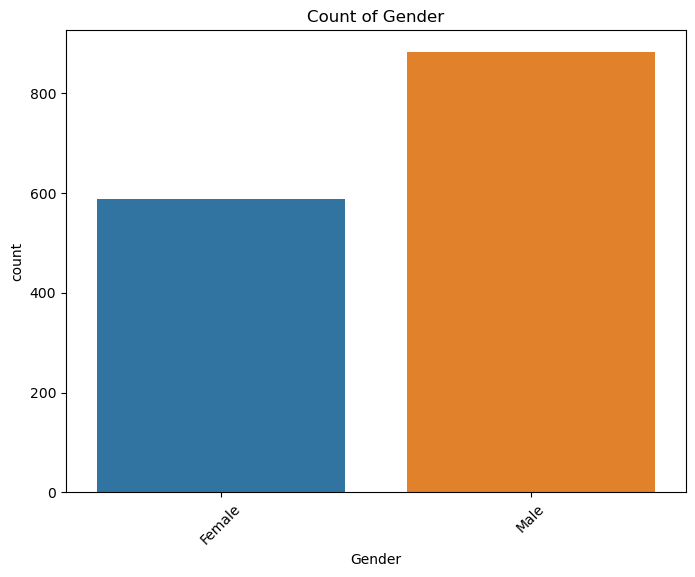

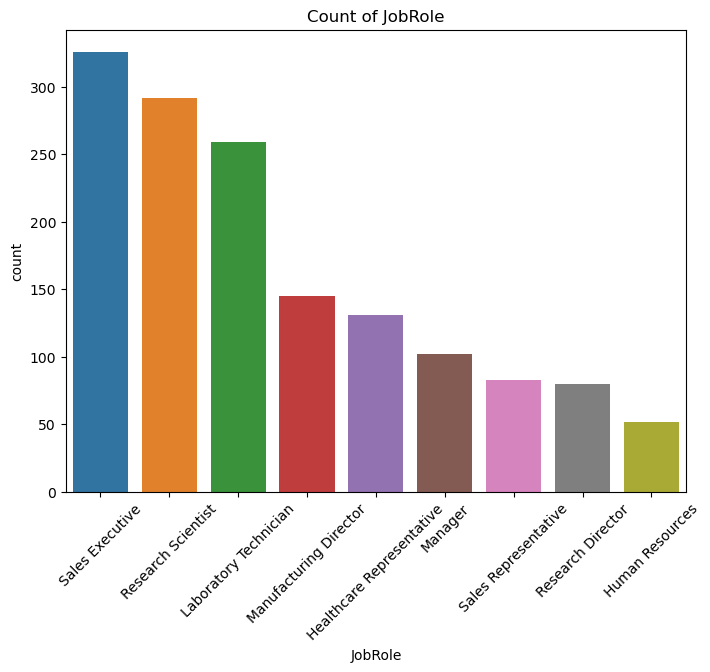

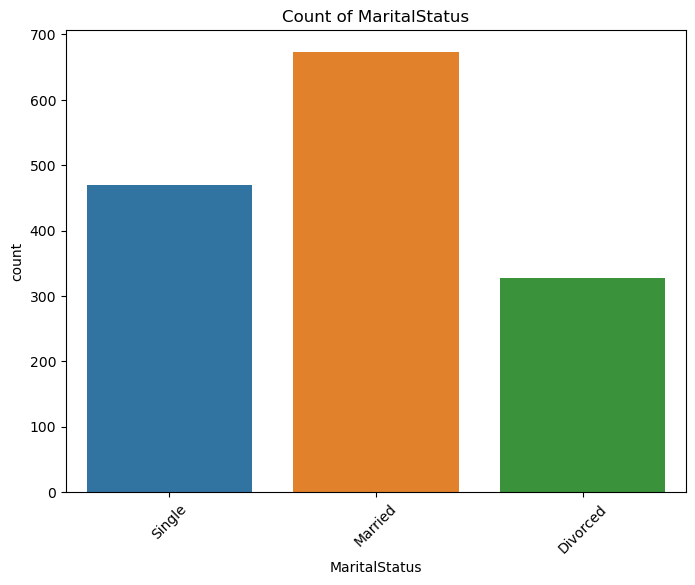

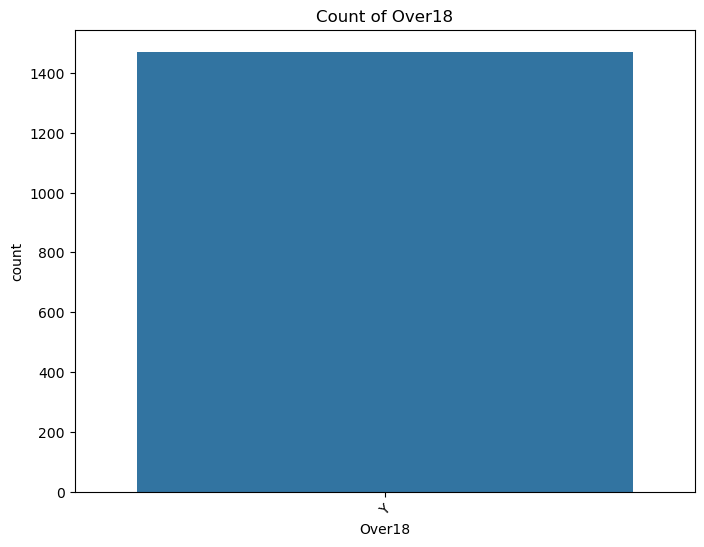

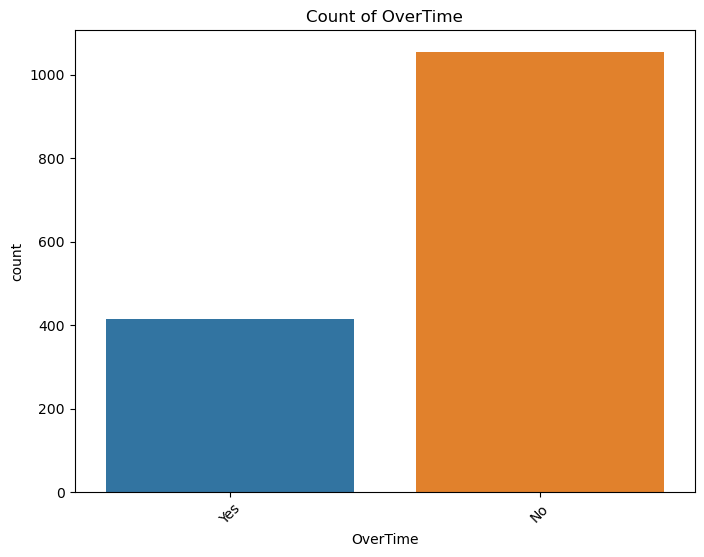

c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


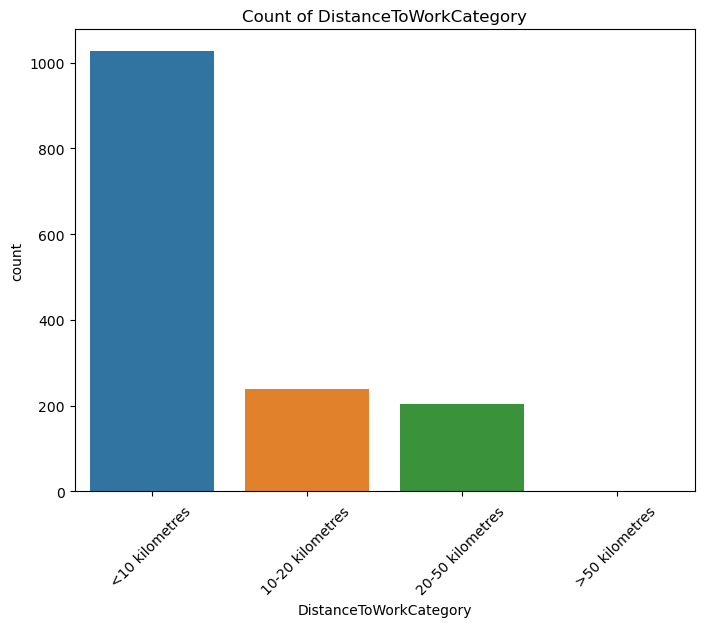

c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


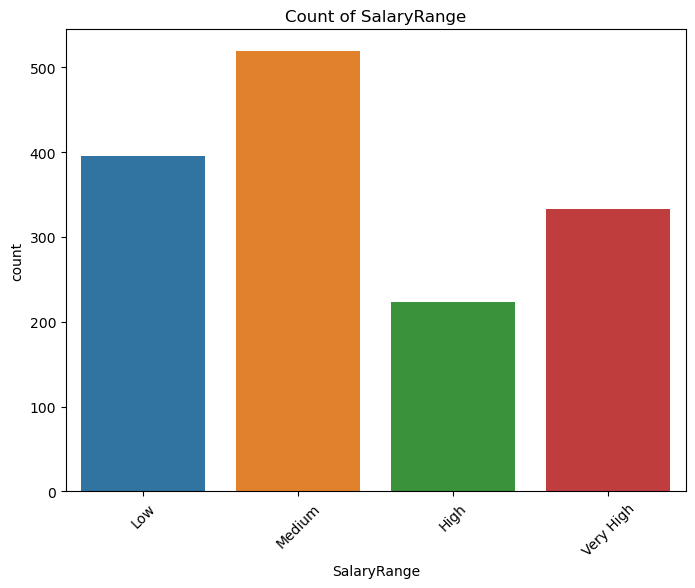

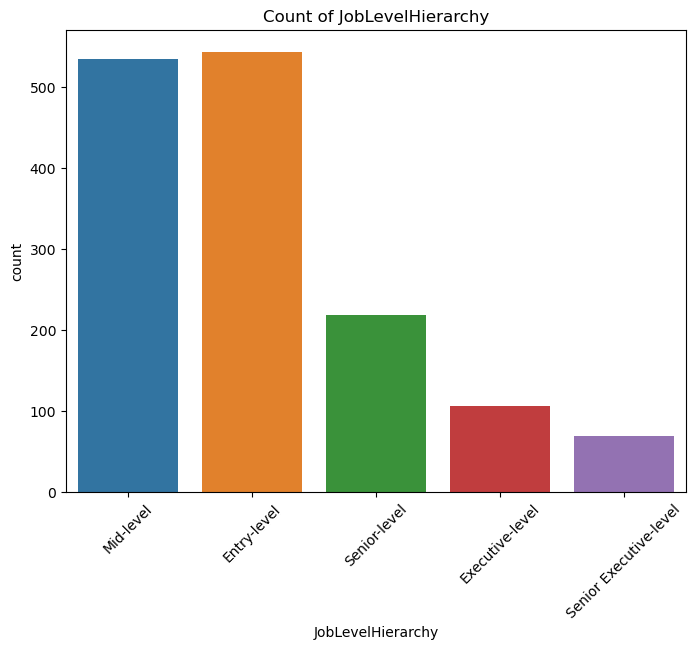

In [565]:
# Bar plot for categorical variables
for category in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=category, data=myDataSet)
    plt.title(f'Count of {category}')
    plt.xticks(rotation=45)
    plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


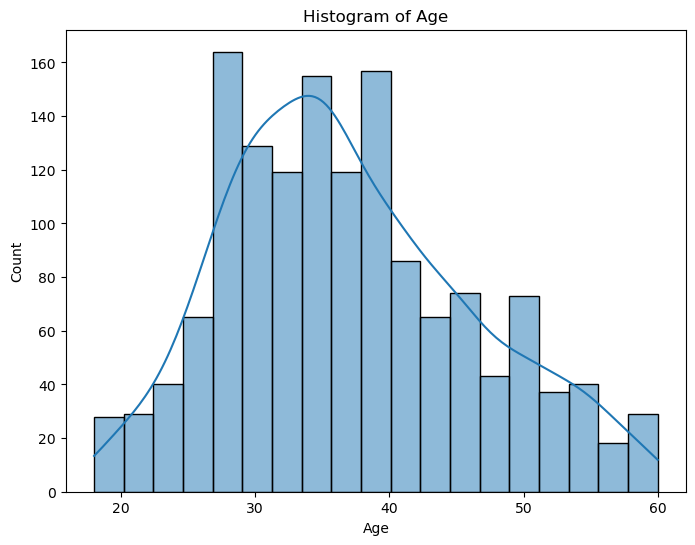

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


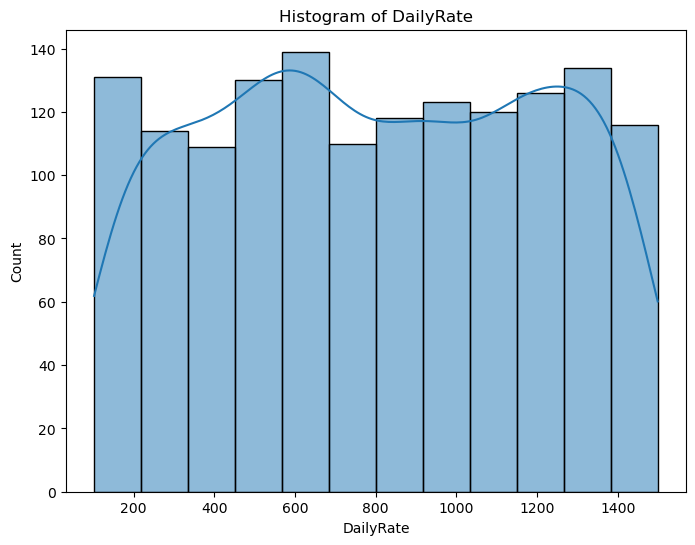

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


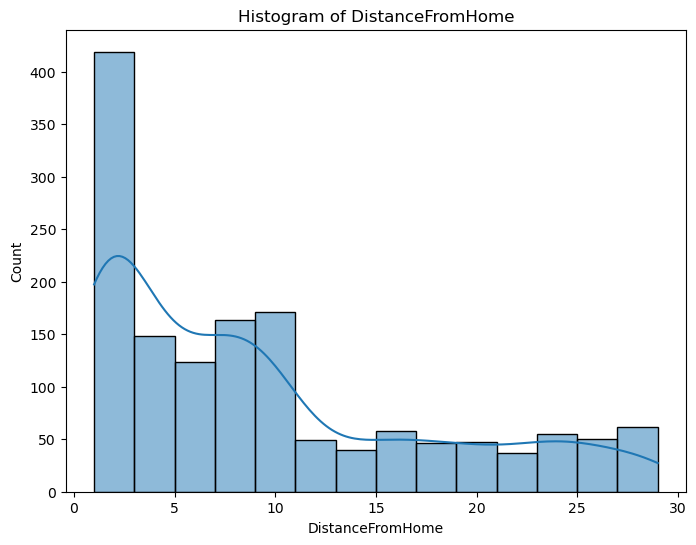

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


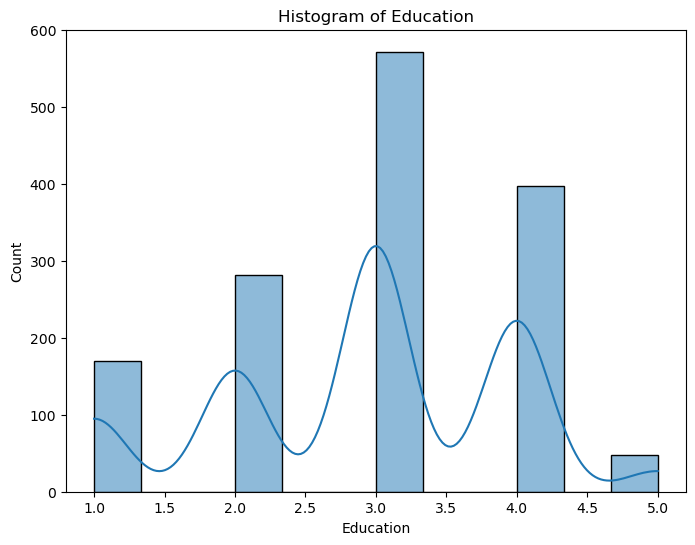

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


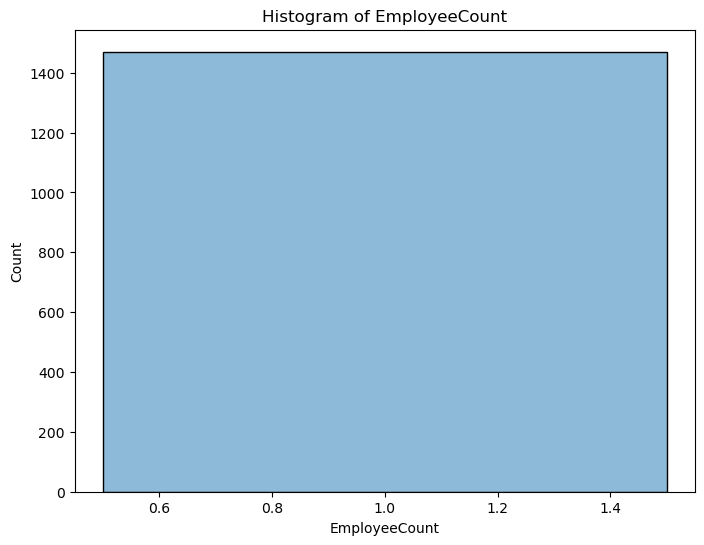

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


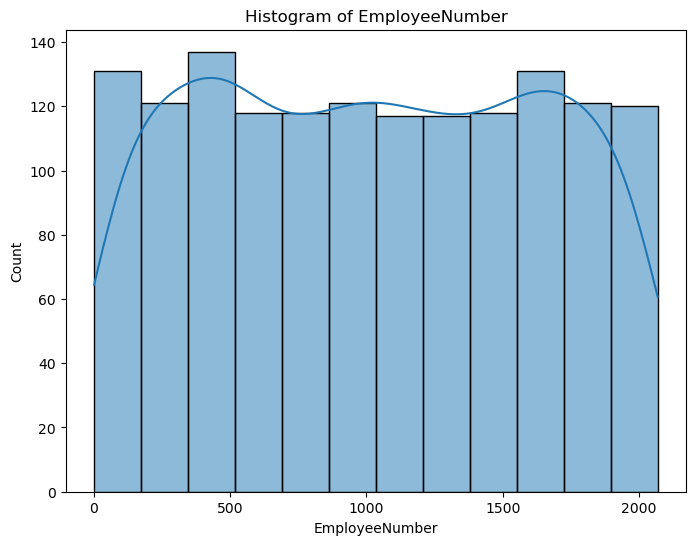

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


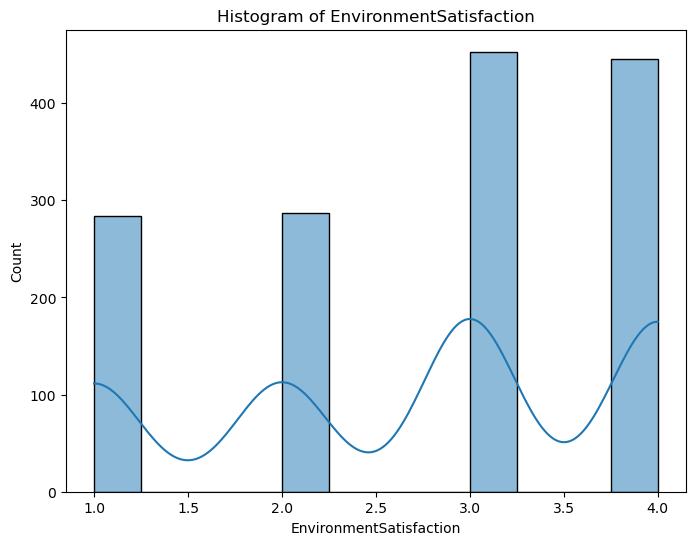

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


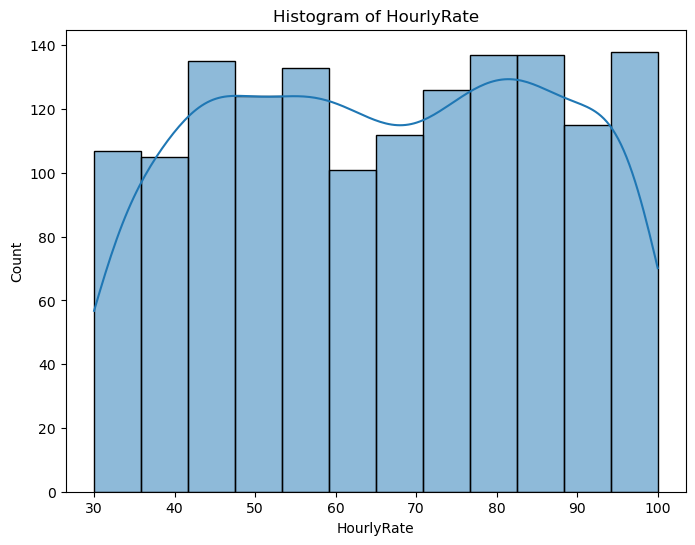

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


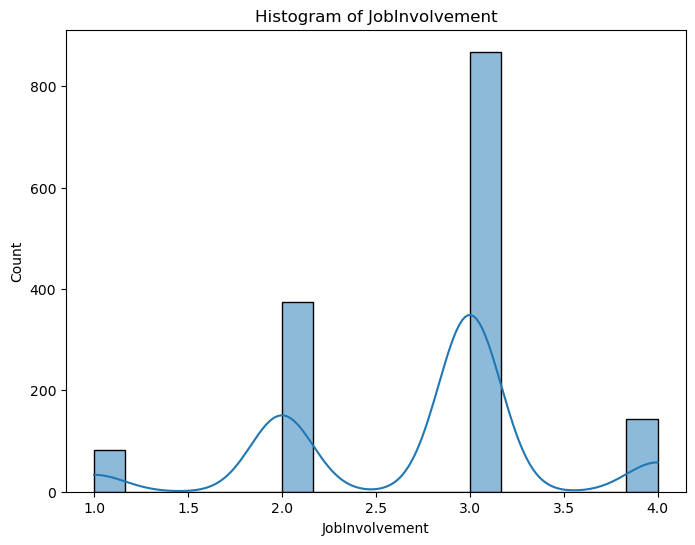

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


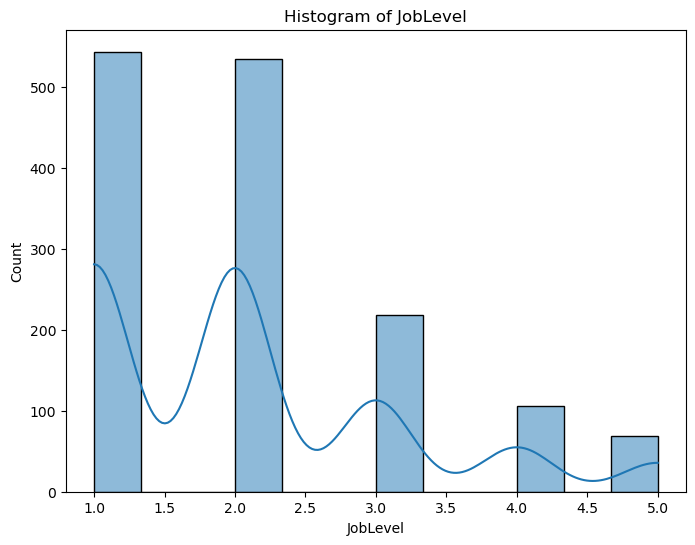

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


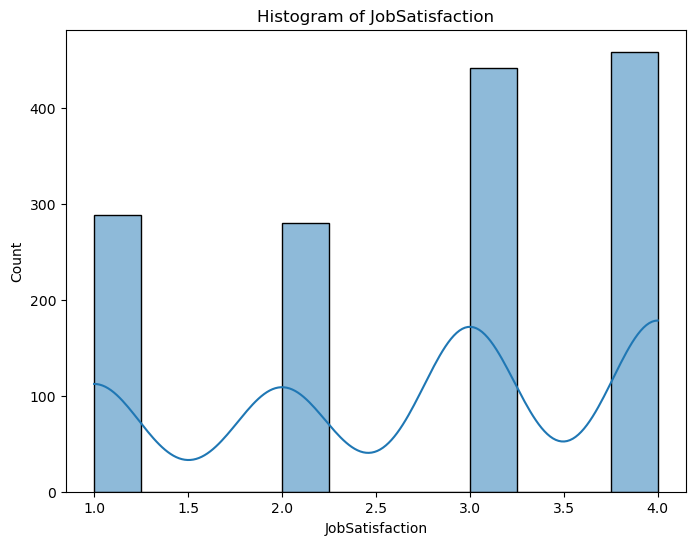

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


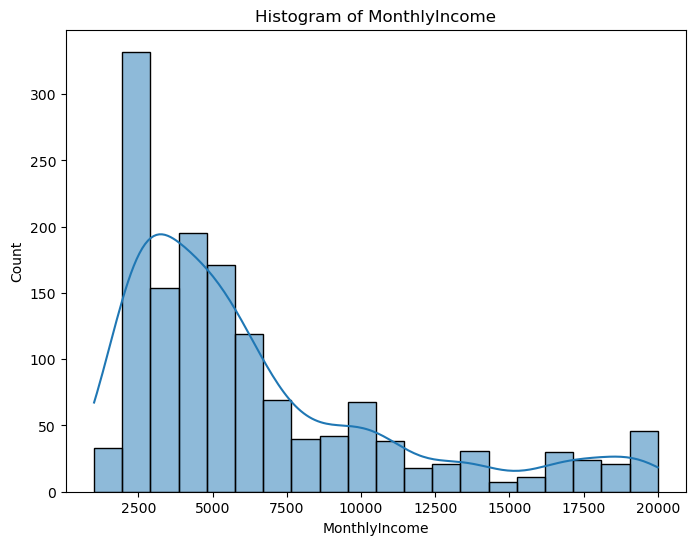

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


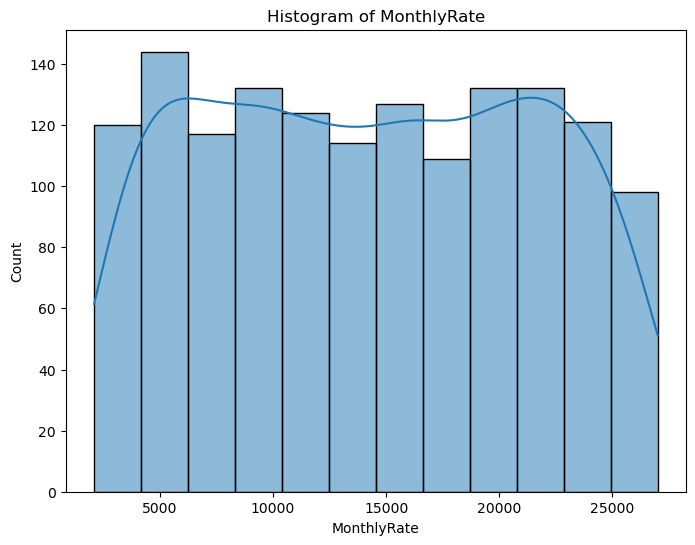

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


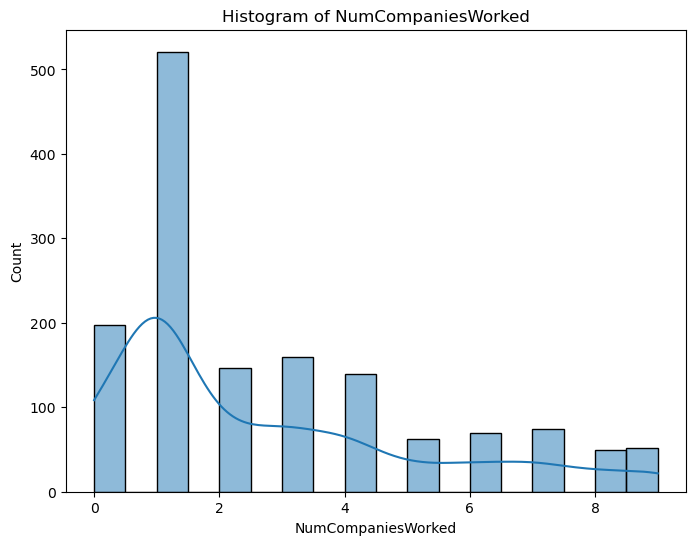

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


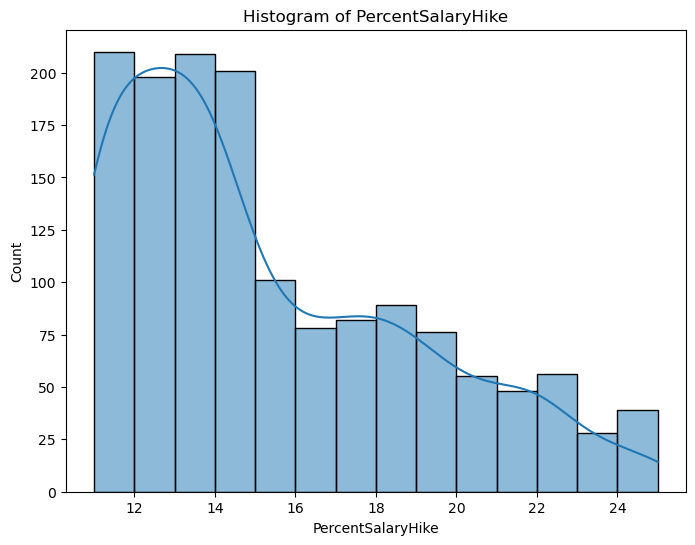

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


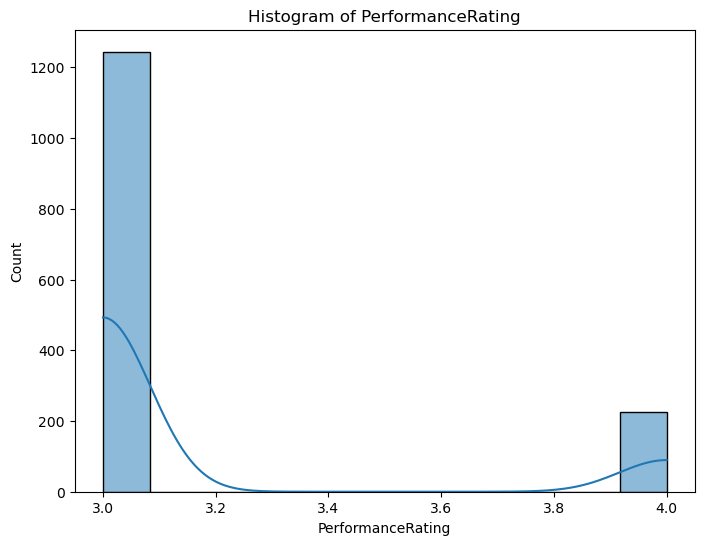

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


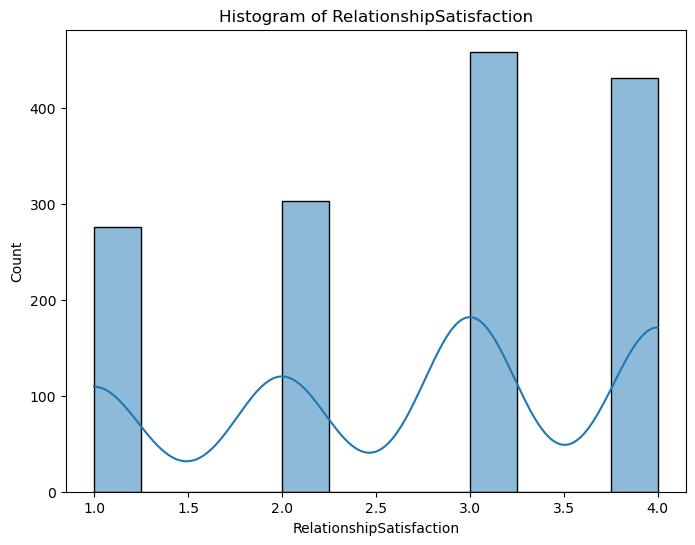

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


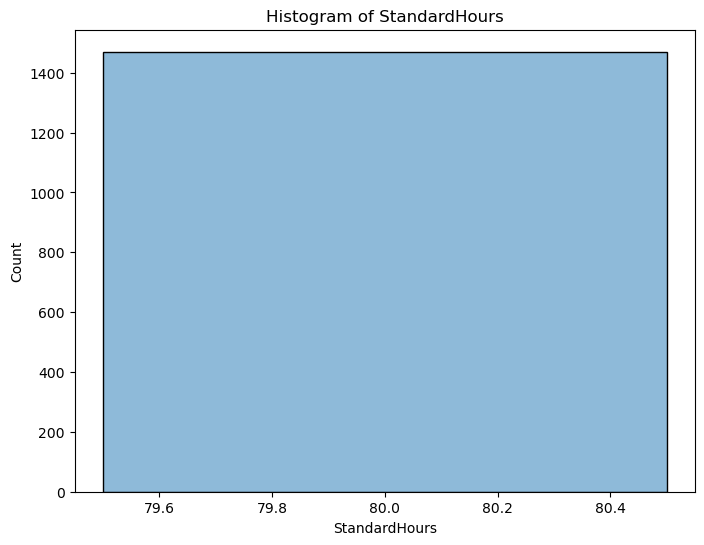

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


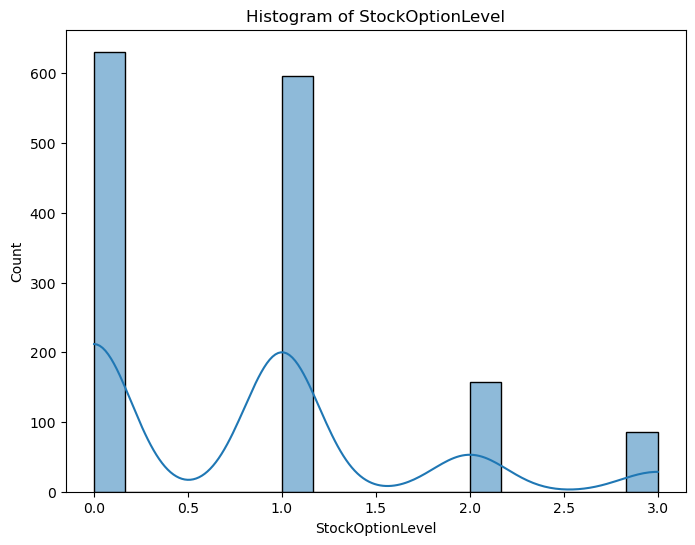

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


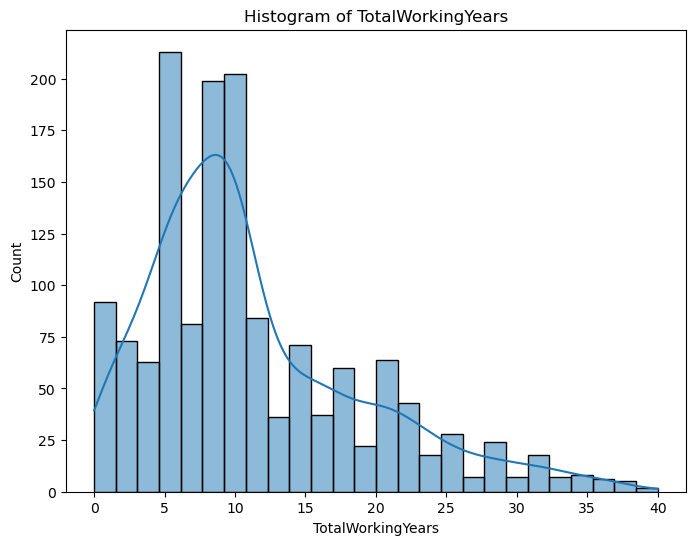

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


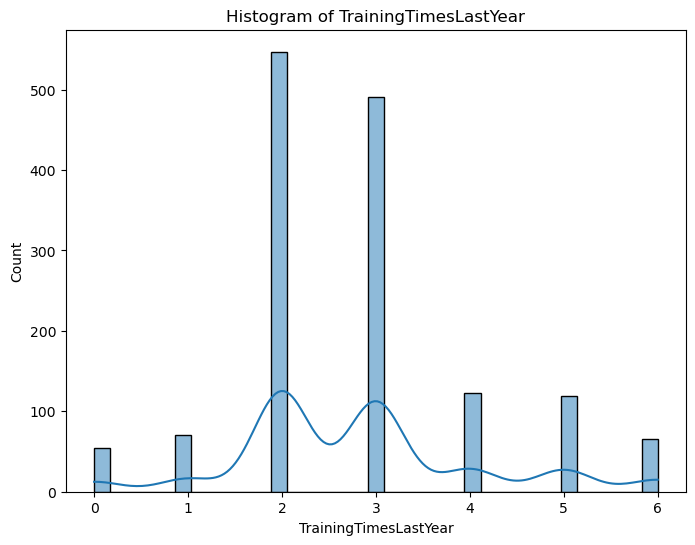

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


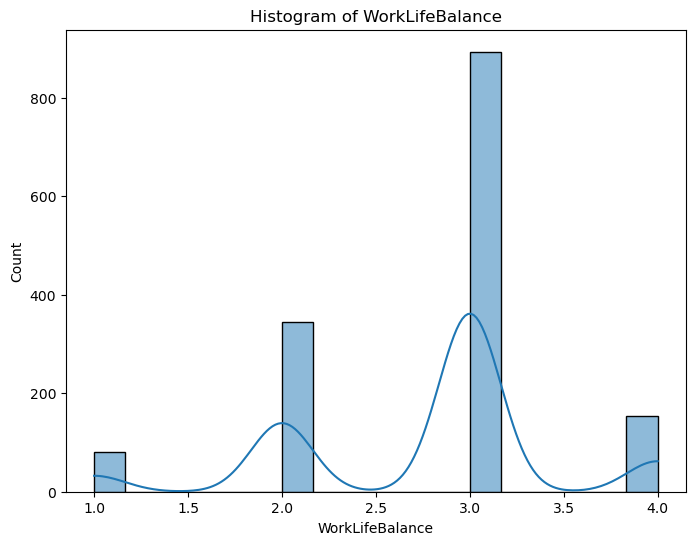

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


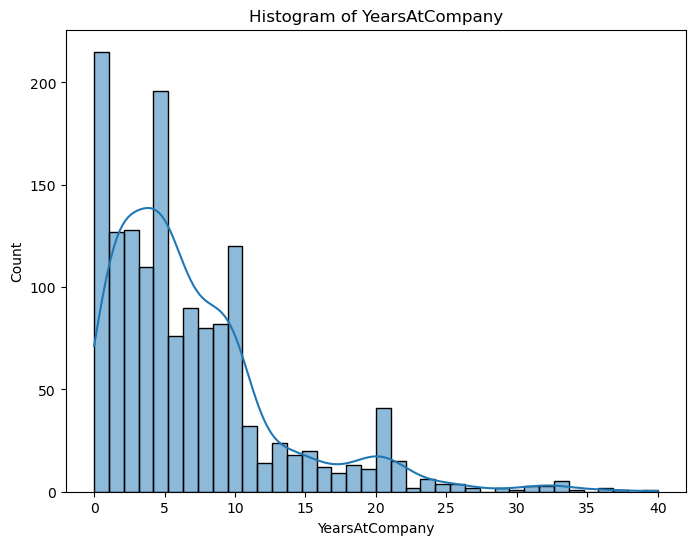

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


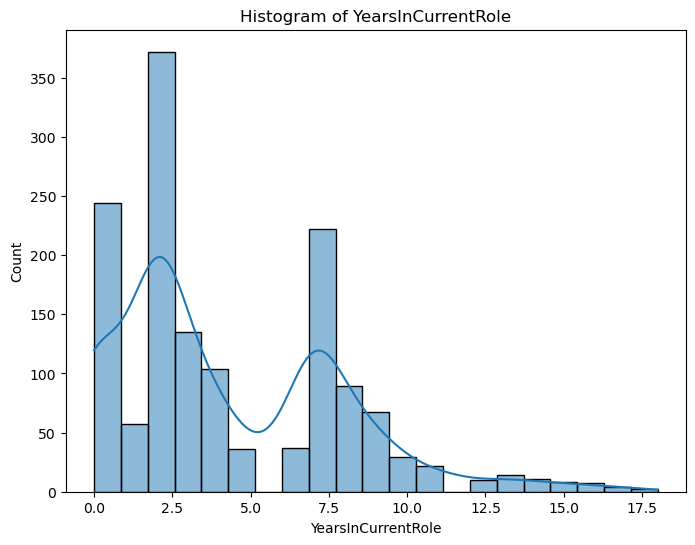

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


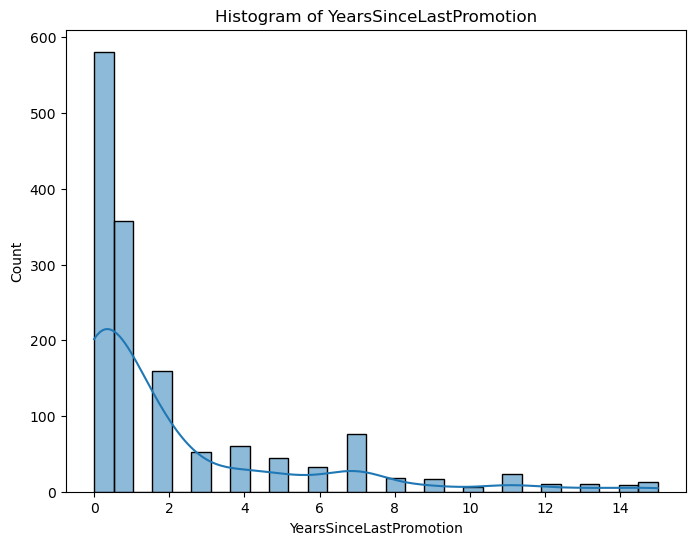

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


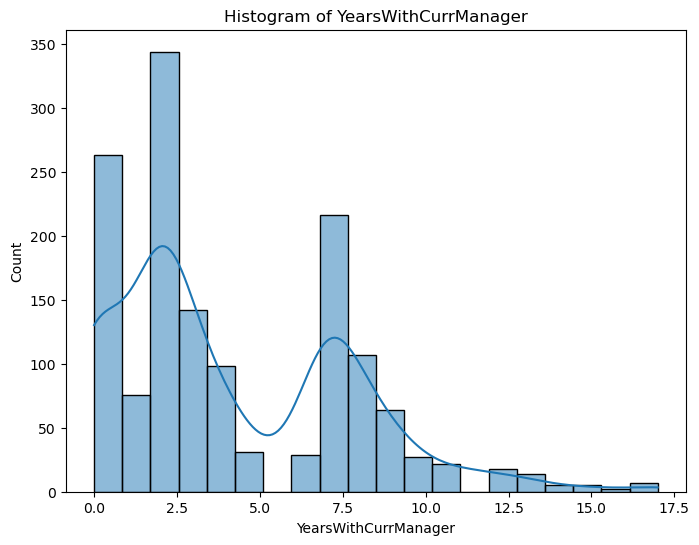

In [567]:
# Histograms for numerical variables

for numerical in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(myDataSet[numerical], kde=True)
    plt.title(f'Histogram of {numerical}')
    plt.show()

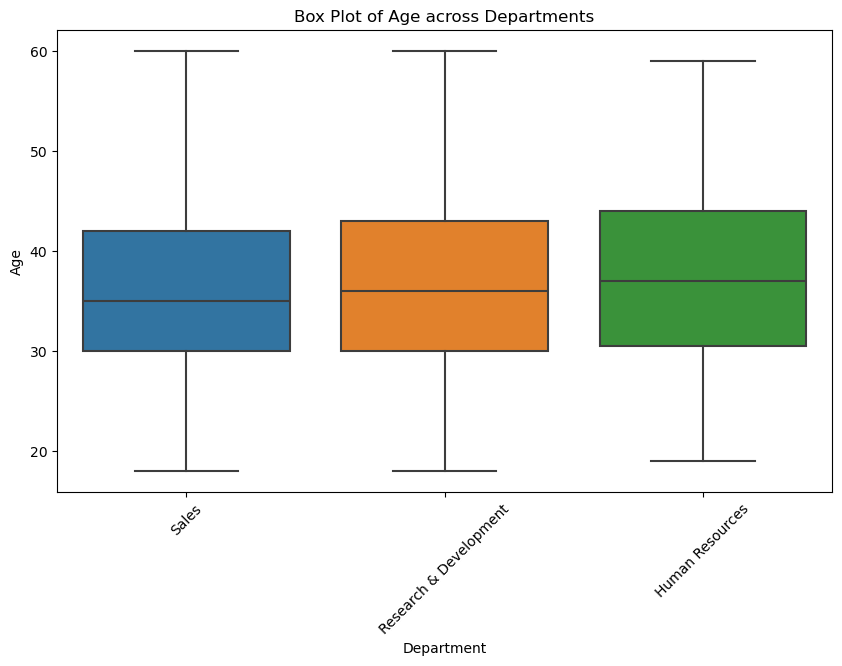

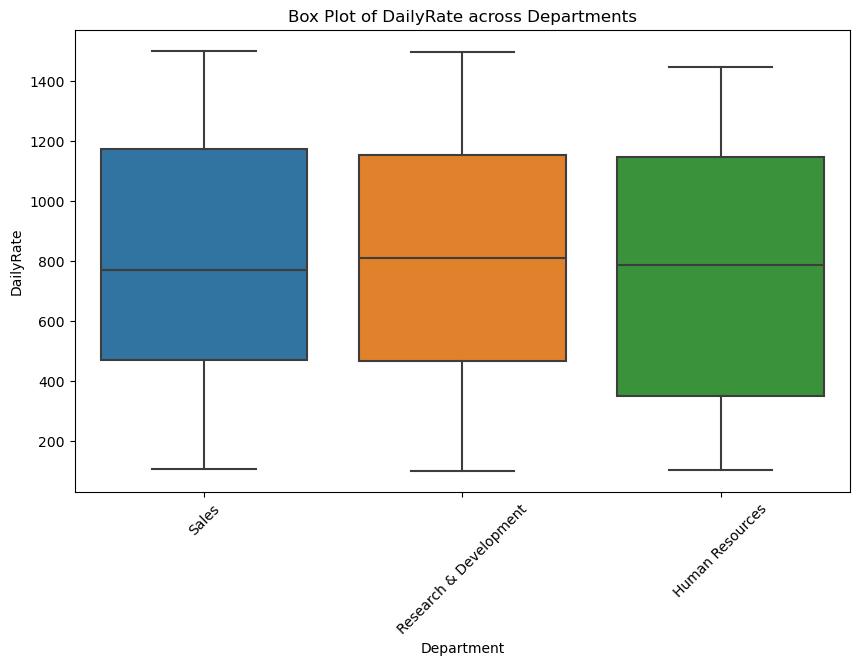

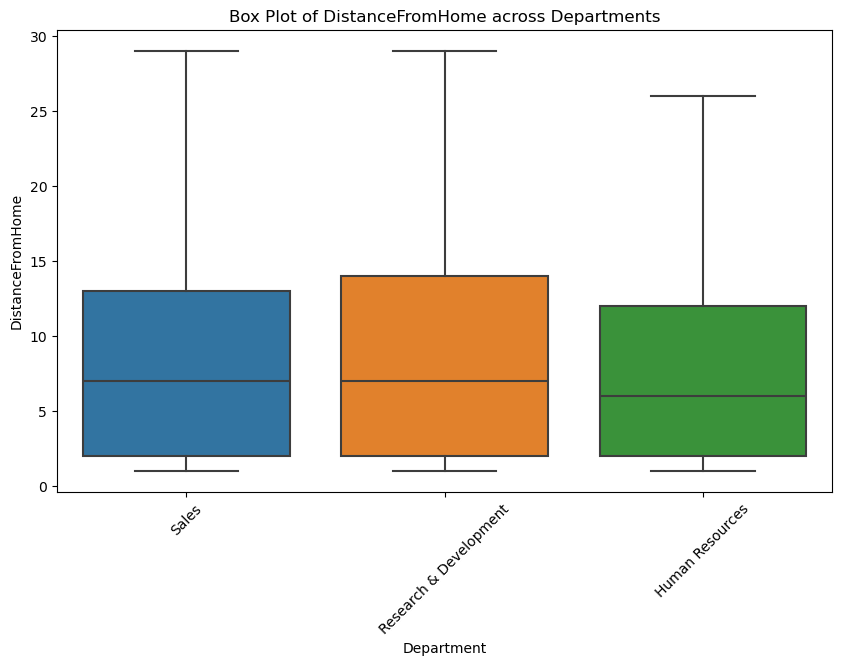

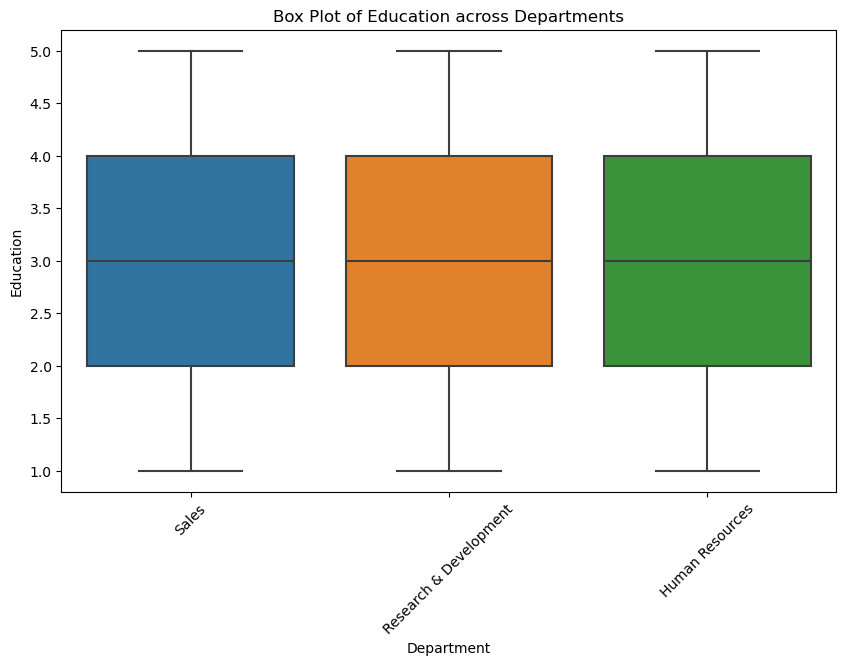

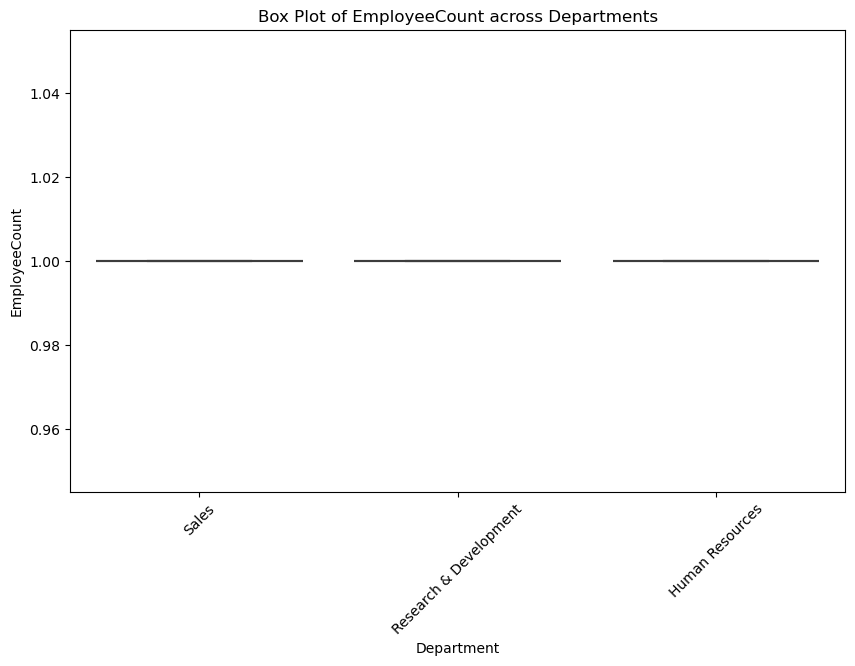

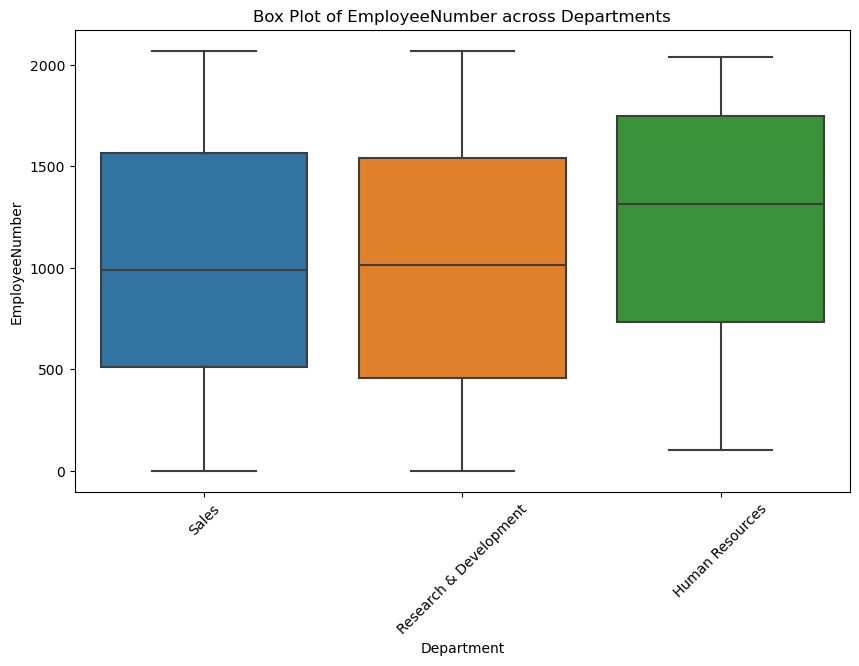

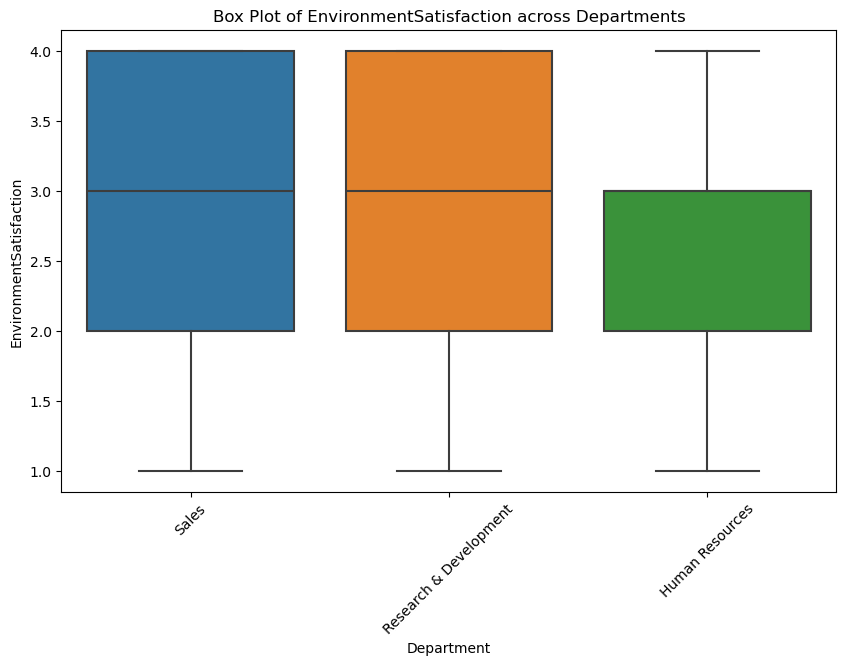

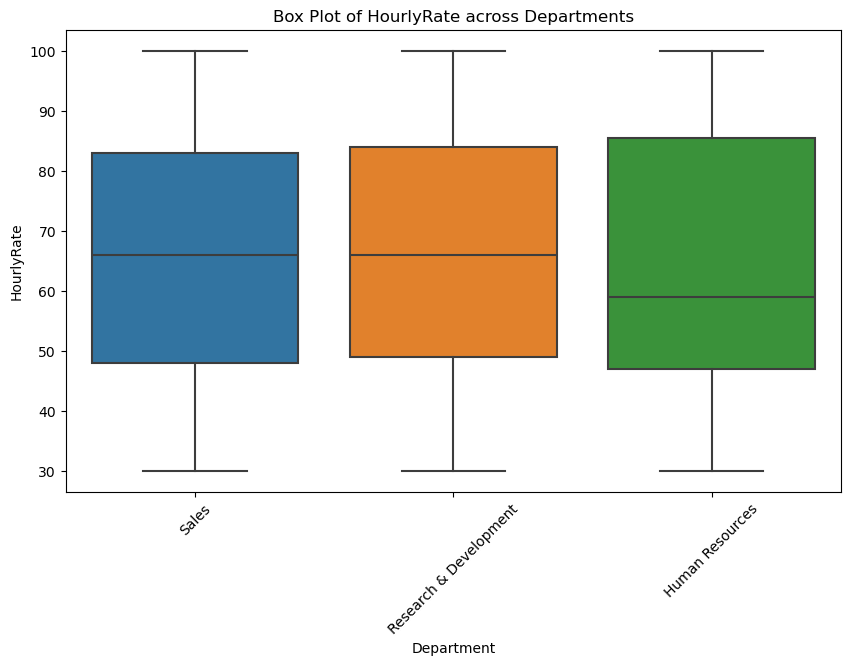

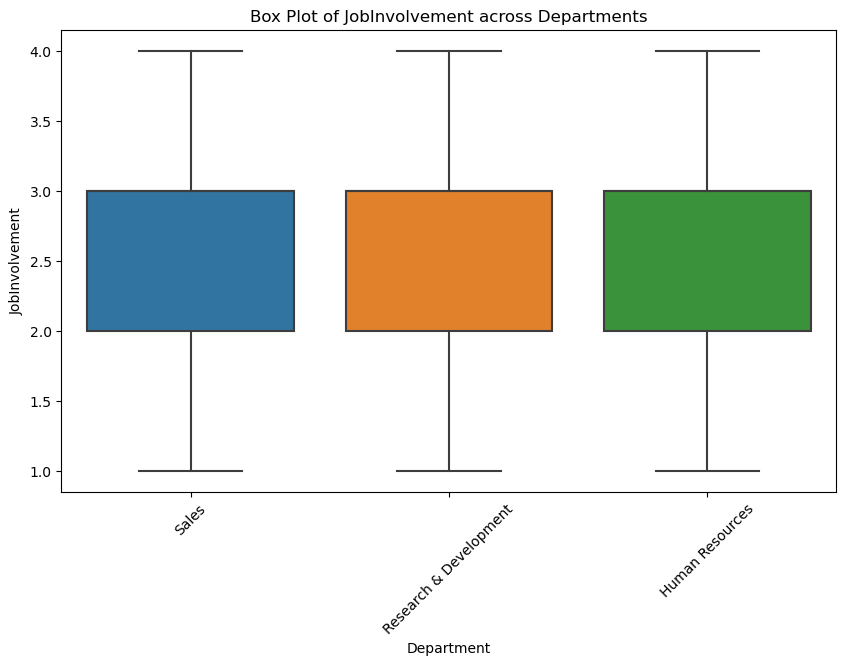

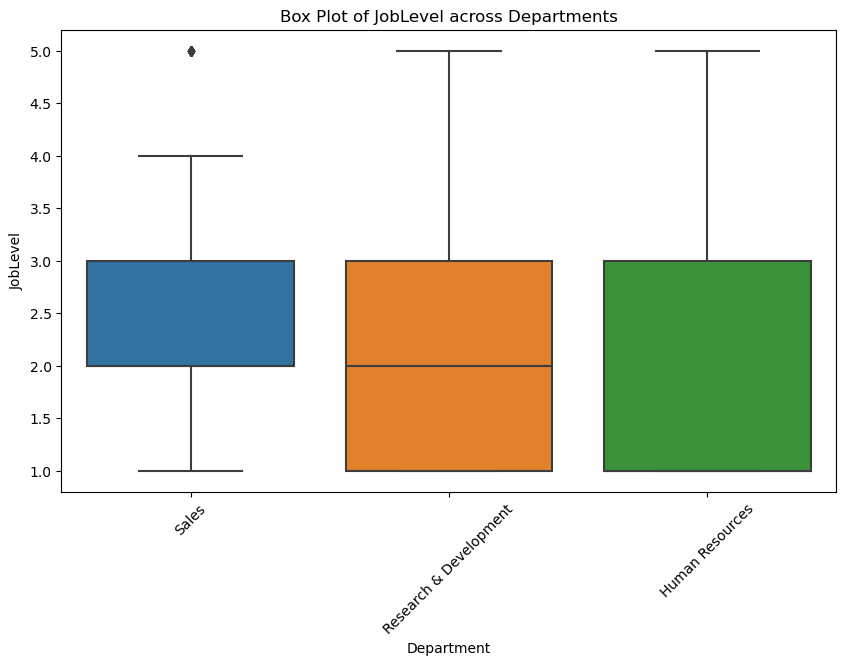

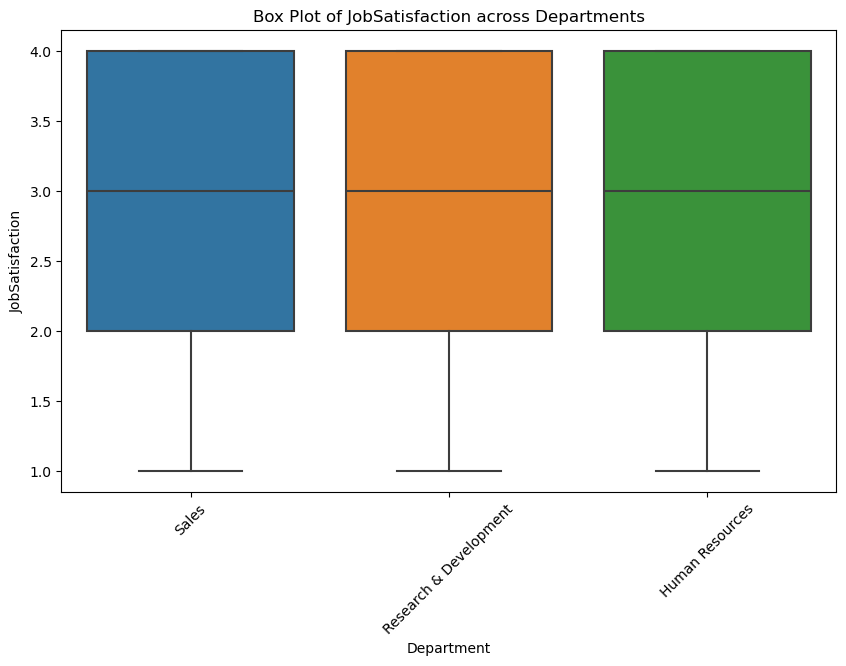

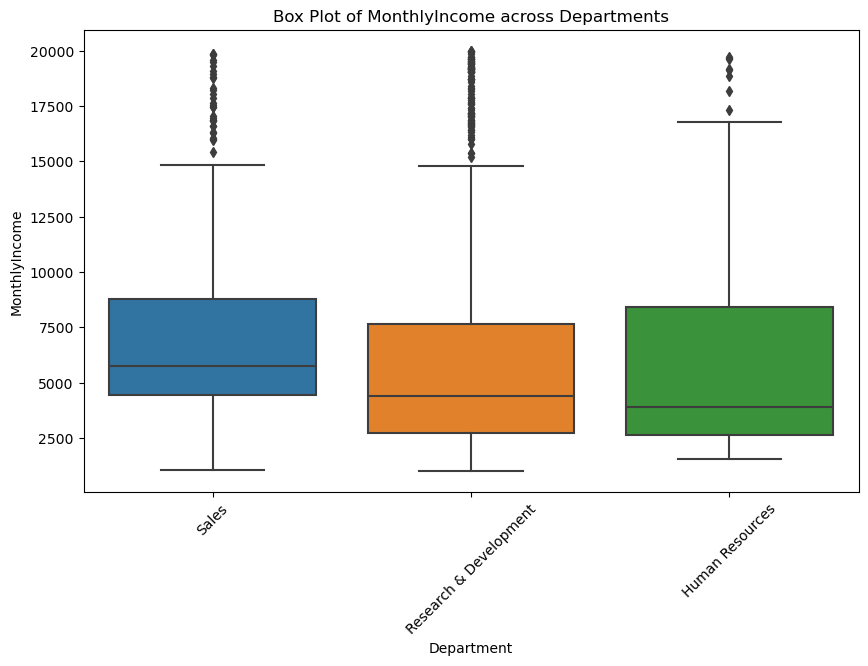

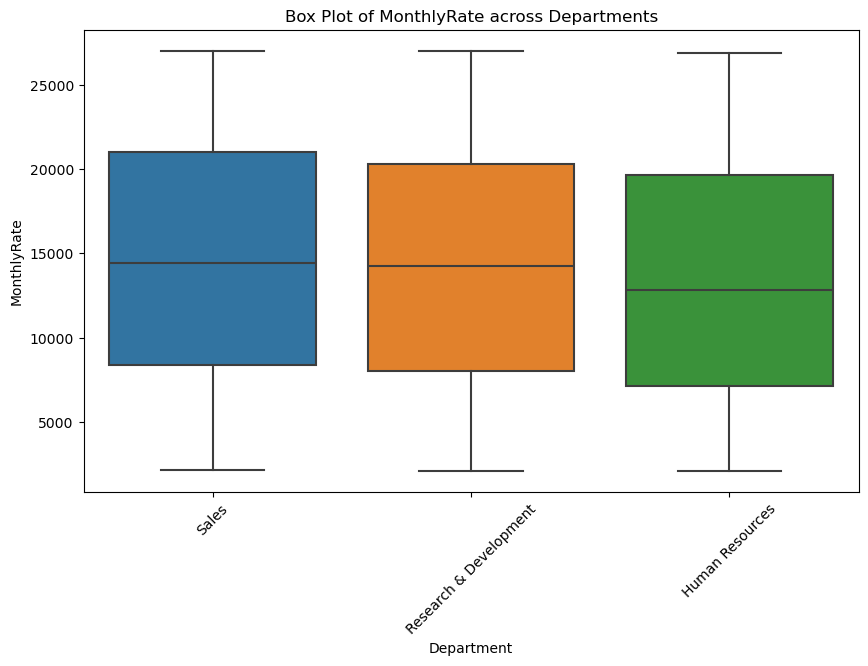

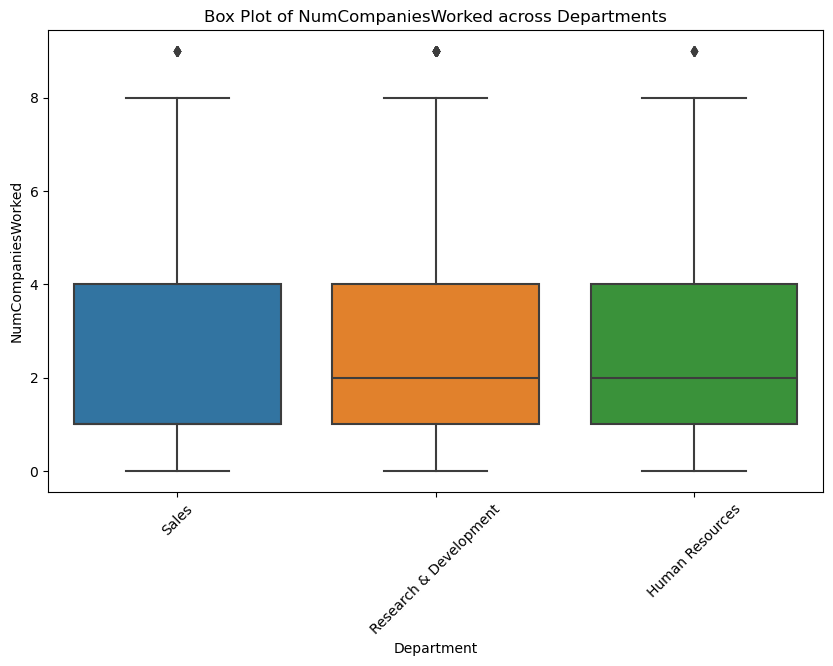

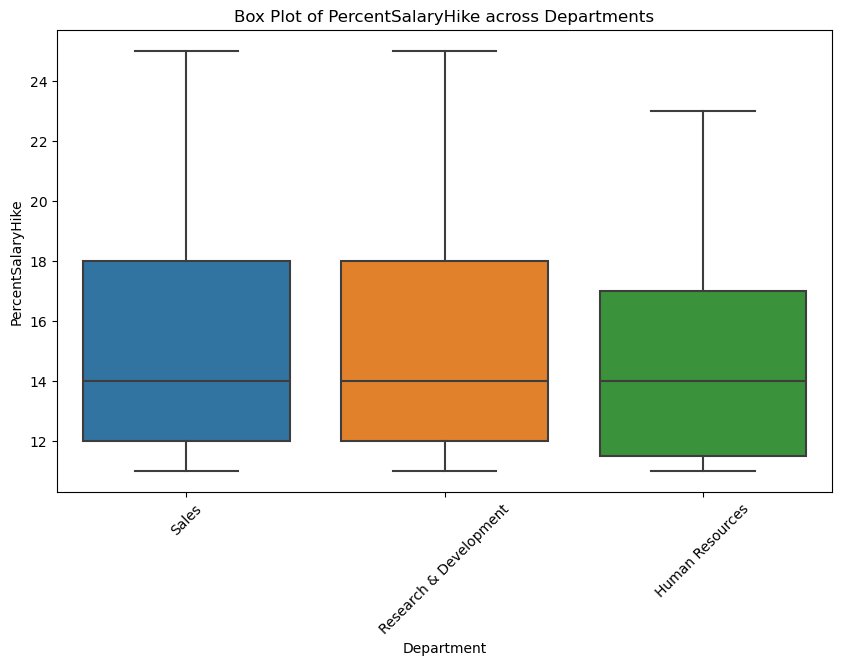

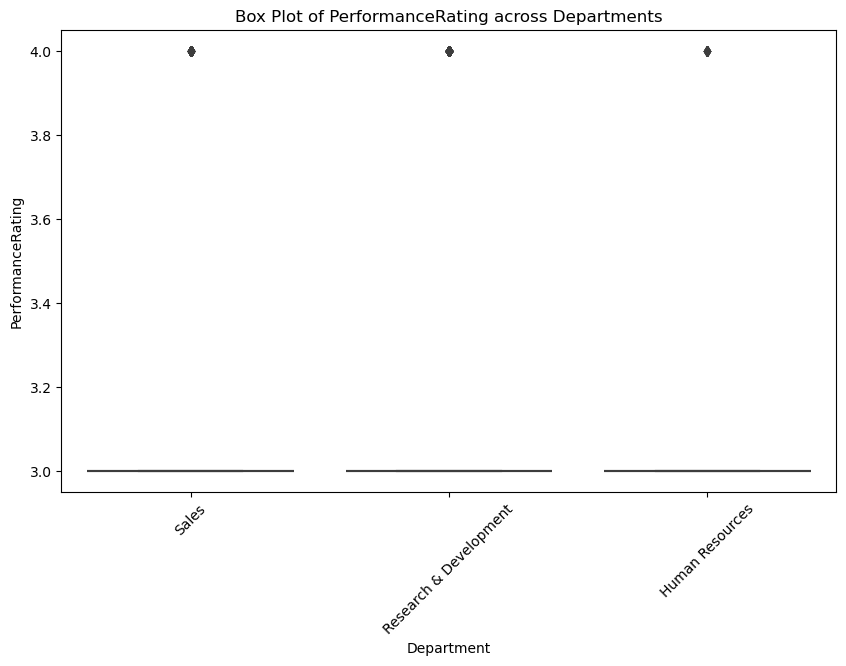

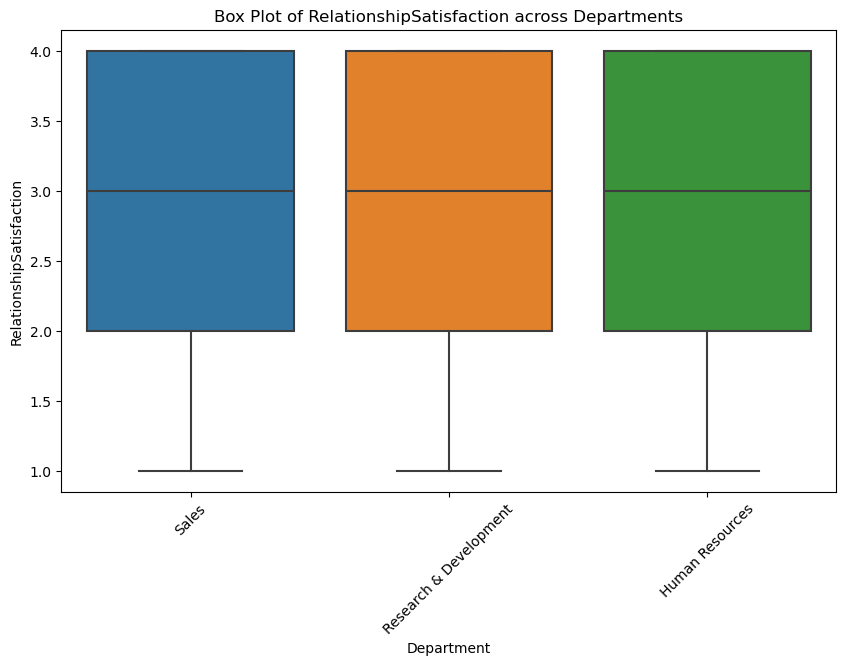

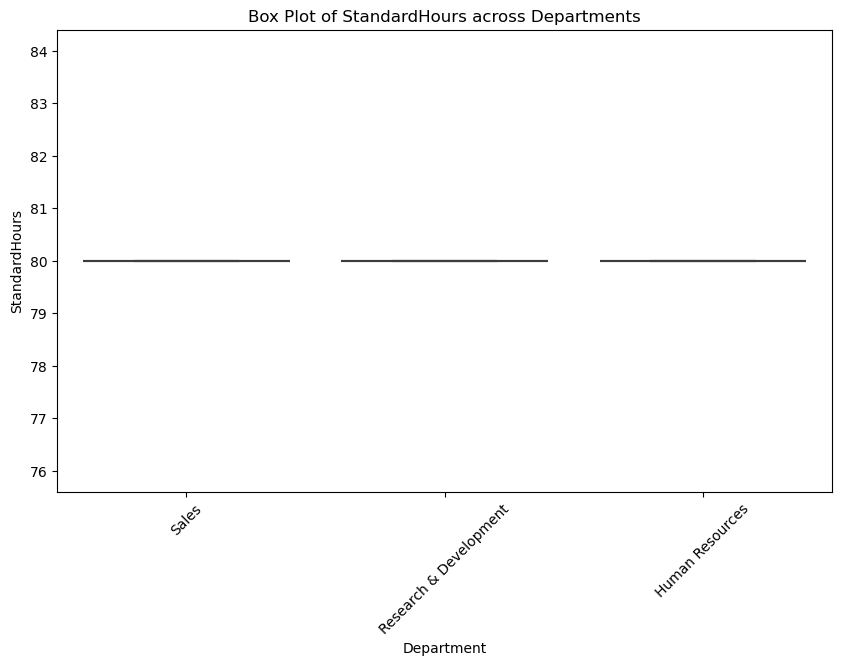

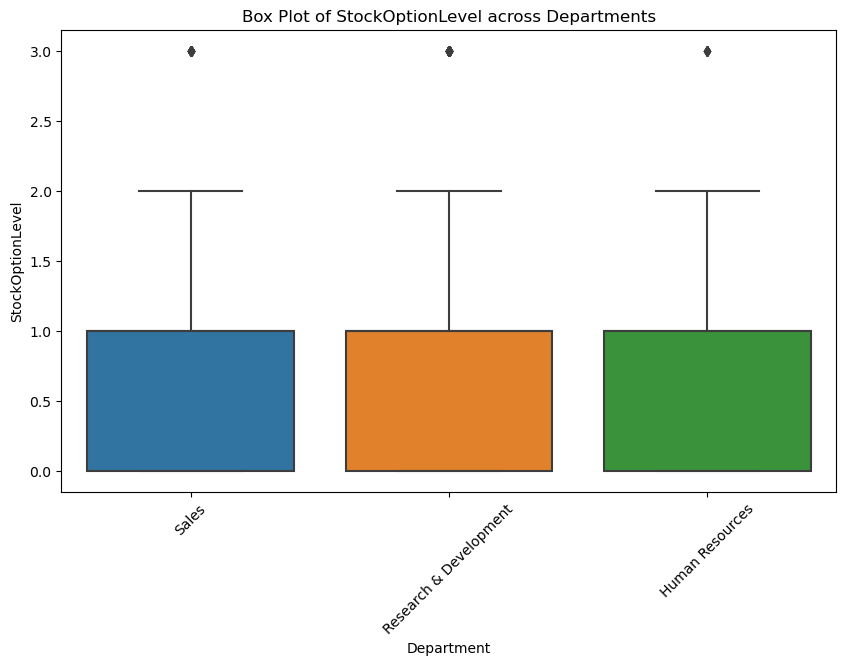

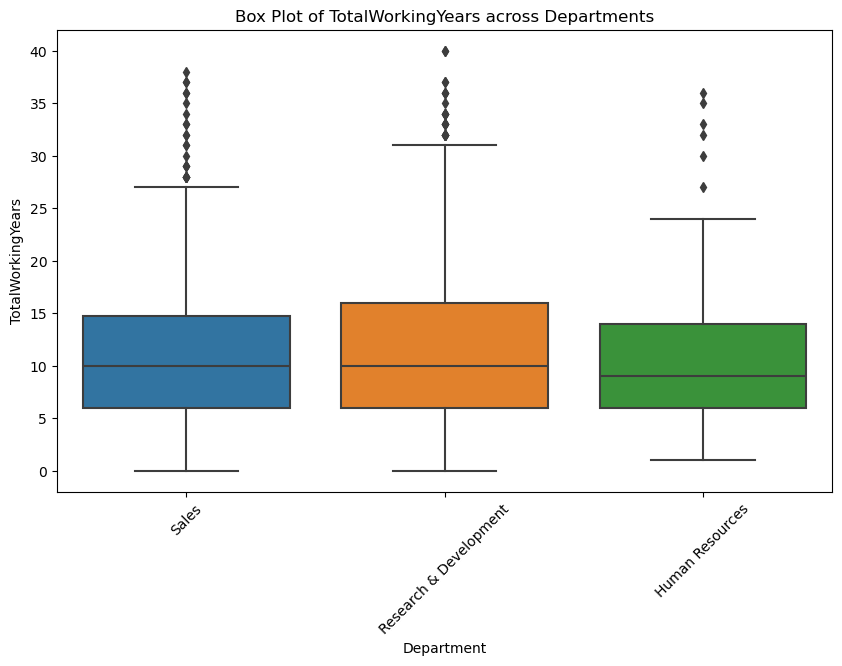

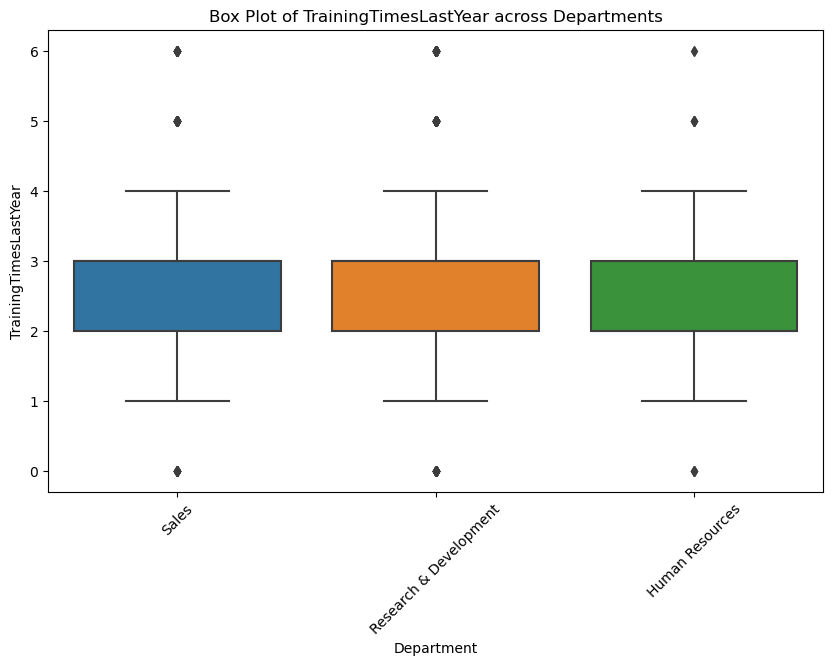

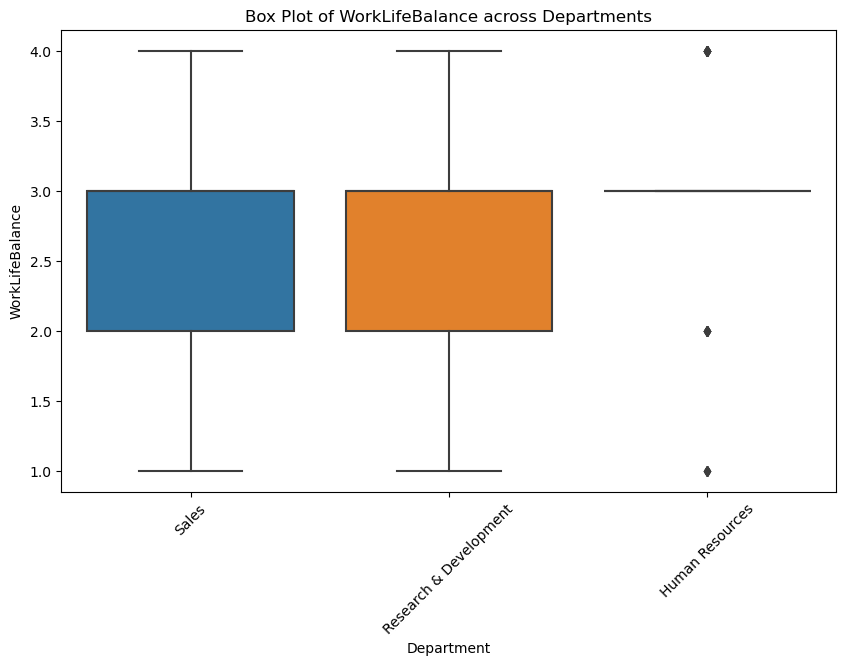

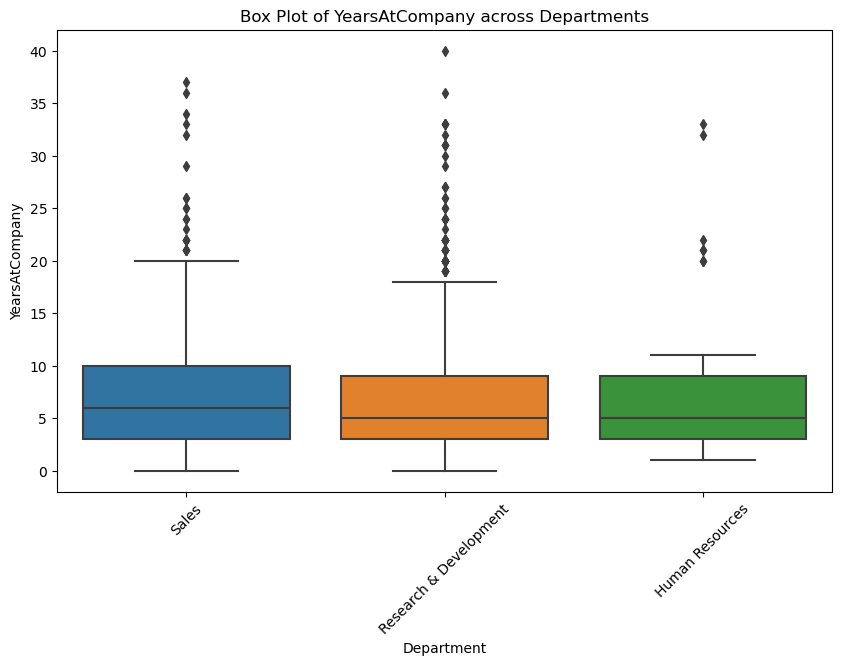

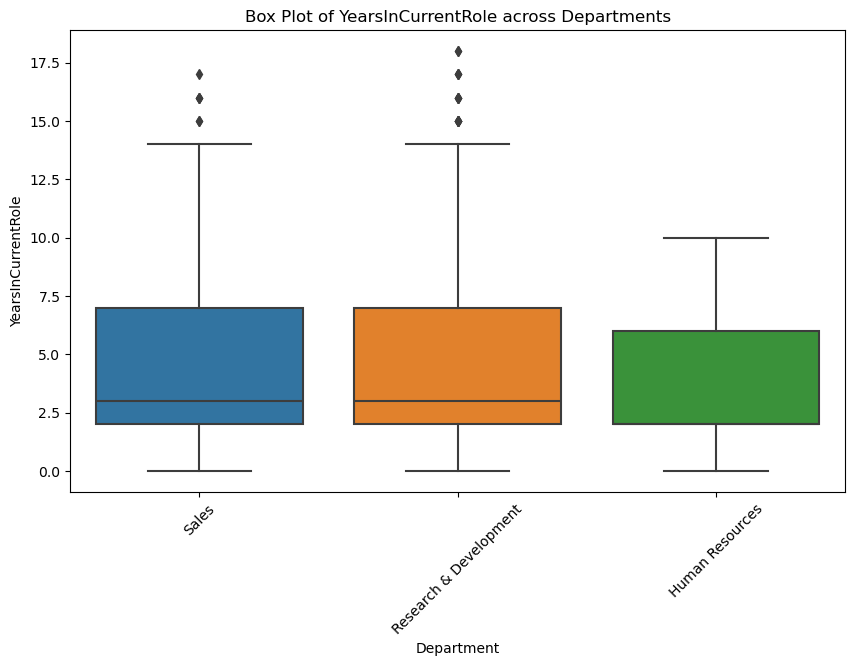

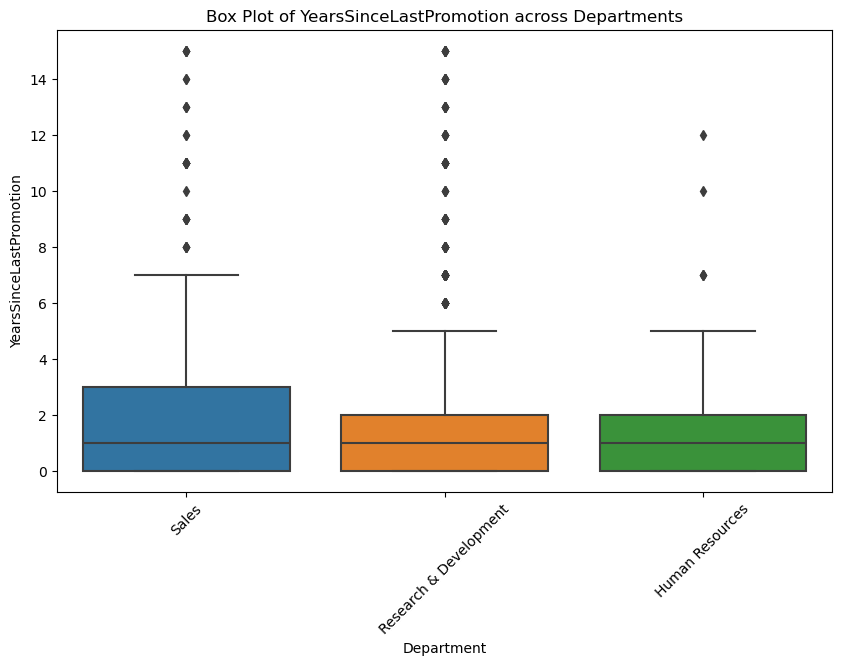

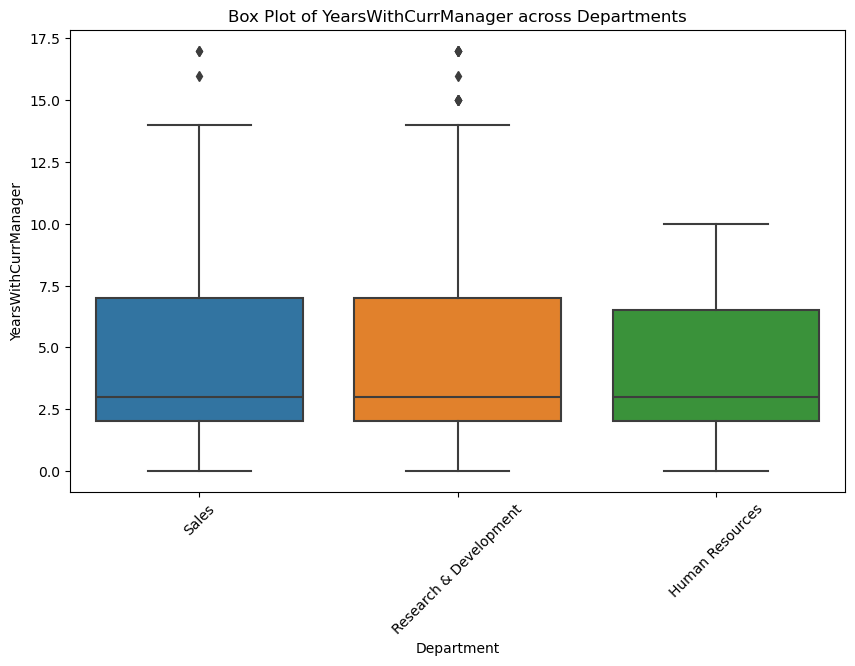

In [569]:
# Box plots for numerical variables vs. categorical variables
for var in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Department', y=var, data=myDataSet)
    plt.title(f'Box Plot of {var} across Departments')
    plt.xticks(rotation=45)
    plt.show()

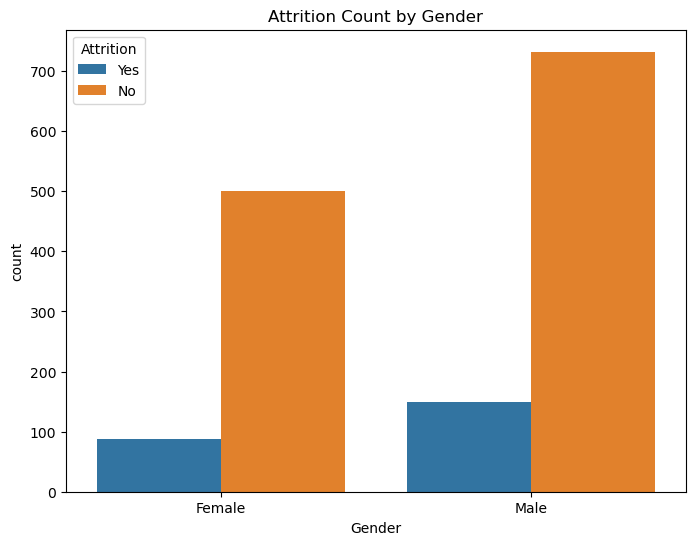

In [570]:
# Attrition count by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=myDataSet)
plt.title('Attrition Count by Gender')
plt.show()

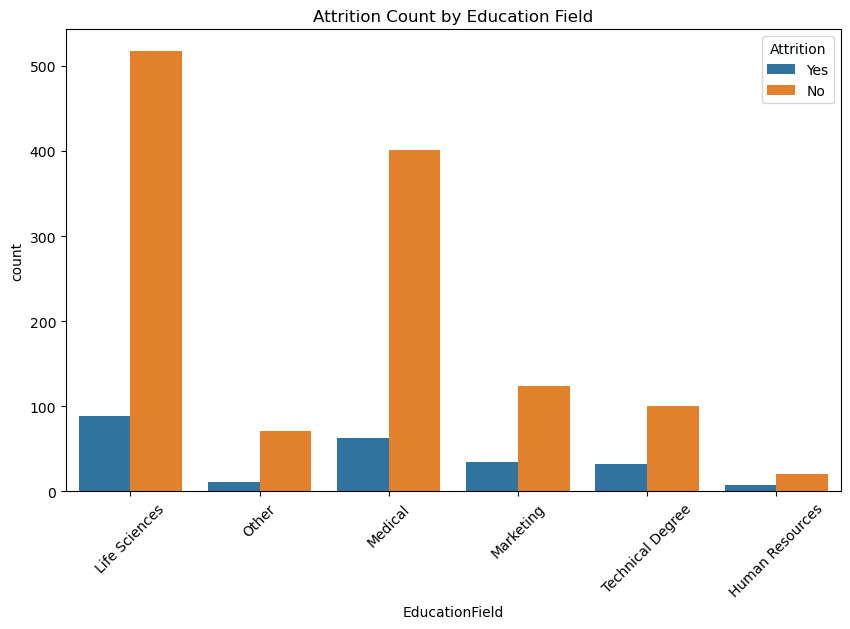

In [571]:

# Attrition count by Education Field
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=myDataSet)
plt.title('Attrition Count by Education Field')
plt.xticks(rotation=45)
plt.show()